In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

model_name = "ANN2"

In [2]:
#df = pd.read_csv("Data_Processed/Recommendation.csv")
df = pd.read_csv("../Data/Crop_production 2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [3]:
df = df.drop(["Unnamed: 0"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Crop_Type           99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
 11  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 9.1+ MB


In [4]:
for i in df.columns:
    print(i,df[i].unique(),df[i].nunique())

State_Name ['andhra pradesh' 'arunachal pradesh' 'assam' 'bihar' 'goa' 'gujarat'
 'haryana' 'jammu and kashmir' 'karnataka' 'kerala' 'madhya pradesh'
 'maharashtra' 'manipur' 'meghalaya' 'mizoram' 'nagaland' 'odisha'
 'punjab' 'rajasthan' 'tamil nadu' 'telangana' 'uttar pradesh'
 'west bengal' 'chandigarh' 'dadra and nagar haveli' 'himachal pradesh'
 'puducherry' 'sikkim' 'tripura' 'andaman and nicobar islands'
 'chhattisgarh' 'uttarakhand' 'jharkhand'] 33
Crop_Type ['kharif' 'rabi' 'summer' 'whole year'] 4
Crop ['cotton' 'horsegram' 'jowar' 'maize' 'moong' 'ragi' 'rice' 'sunflower'
 'wheat' 'sesamum' 'soyabean' 'rapeseed' 'jute' 'arecanut' 'onion'
 'potato' 'sweetpotato' 'tapioca' 'turmeric' 'barley' 'banana' 'coriander'
 'garlic' 'blackpepper' 'cardamom' 'cashewnuts' 'blackgram' 'coffee'
 'ladyfinger' 'brinjal' 'cucumber' 'grapes' 'mango' 'orange' 'papaya'
 'tomato' 'cabbage' 'bottlegourd' 'pineapple' 'carrot' 'radish'
 'bittergourd' 'drumstick' 'jackfruit' 'cauliflower' 'watermelon'

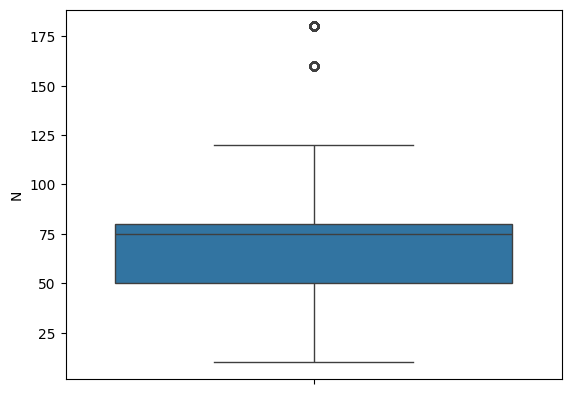

Outlier counter and percentage for N: (5441, 5.449228334785526)


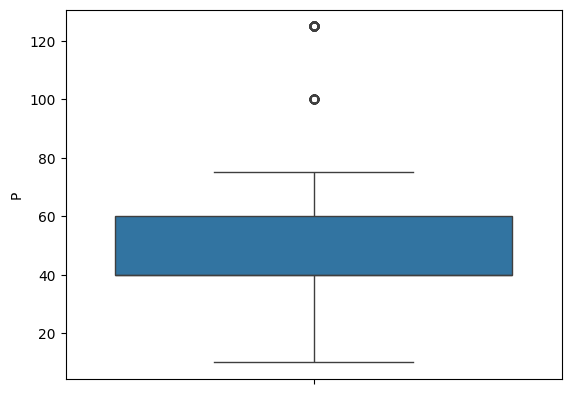

Outlier counter and percentage for P: (152, 0.15222986709931996)


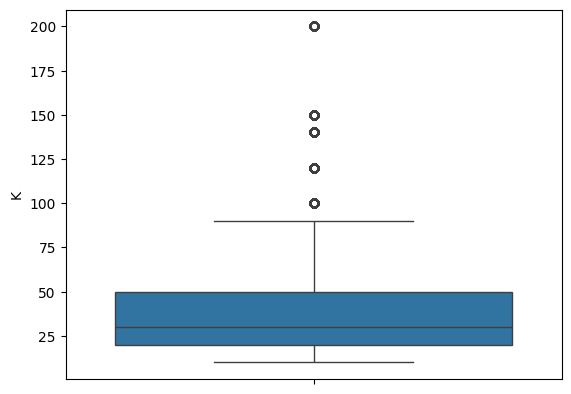

Outlier counter and percentage for K: (7090, 7.100722090356439)


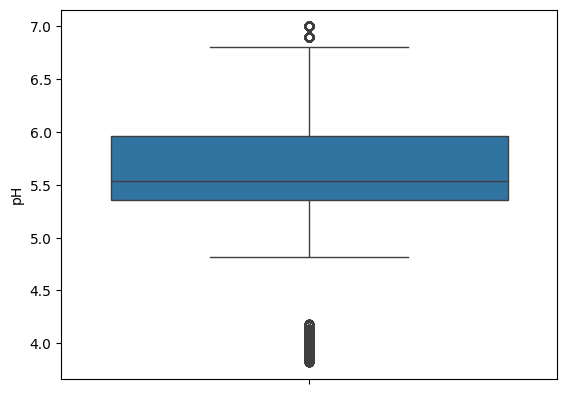

Outlier counter and percentage for pH: (1355, 1.3570491442077537)


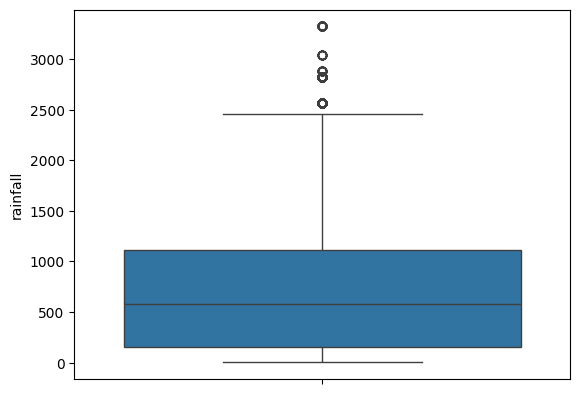

Outlier counter and percentage for rainfall: (1952, 1.9549519774860038)


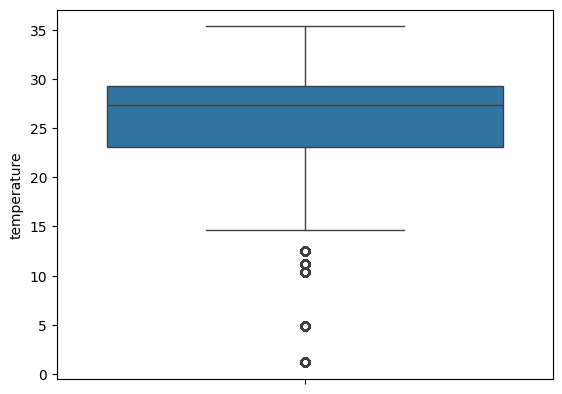

Outlier counter and percentage for temperature: (1596, 1.5984136045428599)


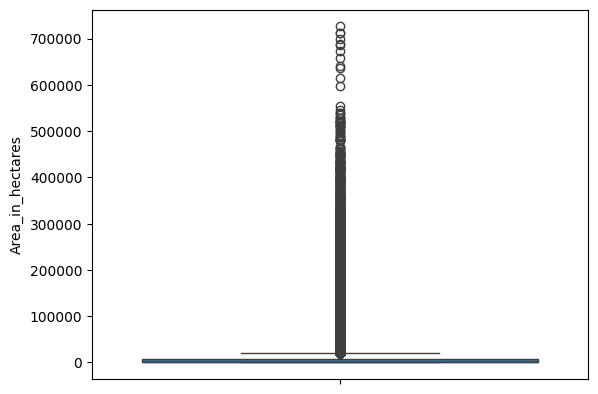

Outlier counter and percentage for Area_in_hectares: (16668, 16.693206742180696)


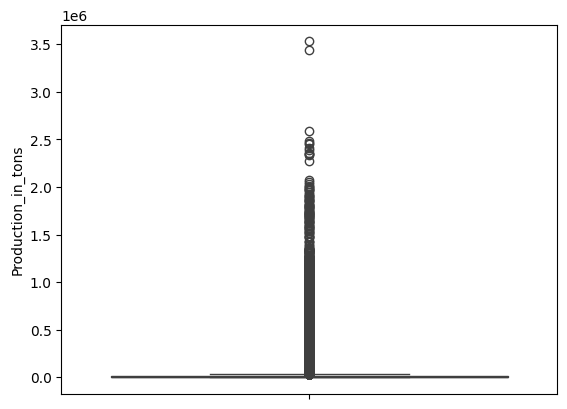

Outlier counter and percentage for Production_in_tons: (16912, 16.93757573936644)


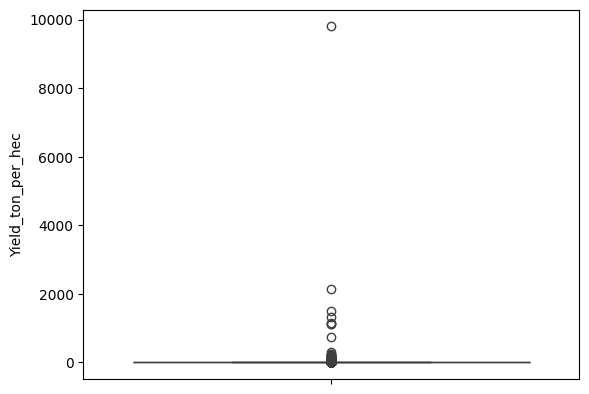

Outlier counter and percentage for Yield_ton_per_hec: (14792, 14.814369698244349)


In [5]:
def outlier_info(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    total_count = df.shape[0]
    outlier_percentage = (outlier_count / total_count) * 100

    return outlier_count, outlier_percentage

def outlier_remover(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(df[i])
        plt.show()
        print(f"Outlier counter and percentage for {i}: {outlier_info(df, i)}")


c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


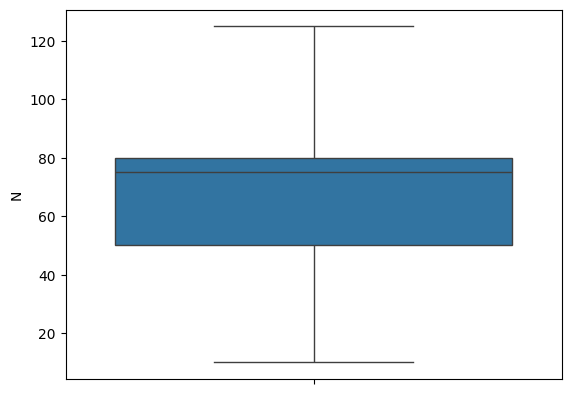

Outlier counter and percentage for N: (0, 0.0)


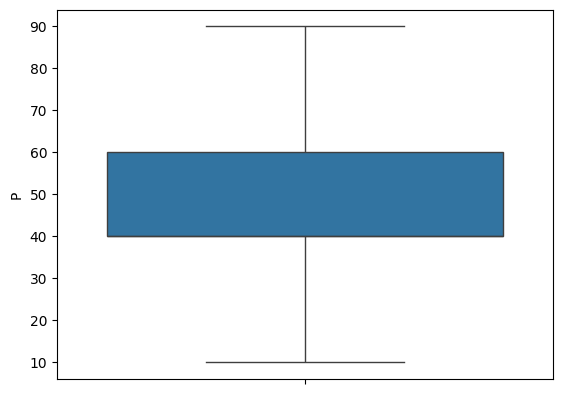

Outlier counter and percentage for P: (0, 0.0)


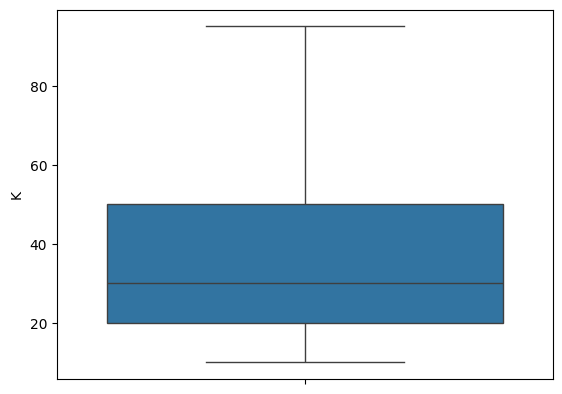

Outlier counter and percentage for K: (0, 0.0)


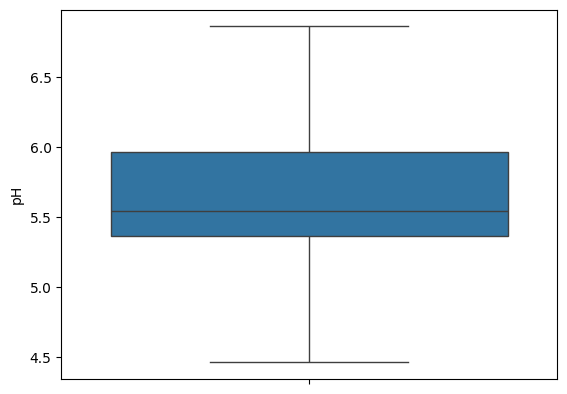

Outlier counter and percentage for pH: (0, 0.0)


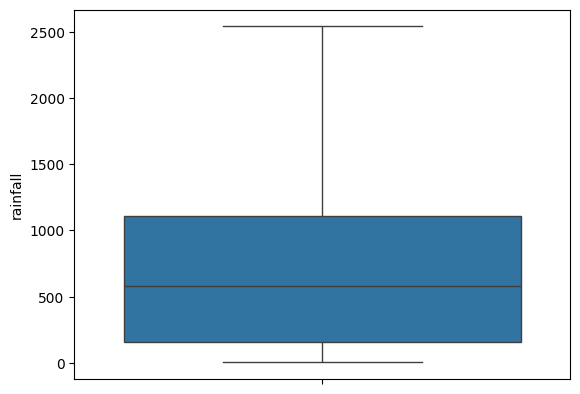

Outlier counter and percentage for rainfall: (0, 0.0)


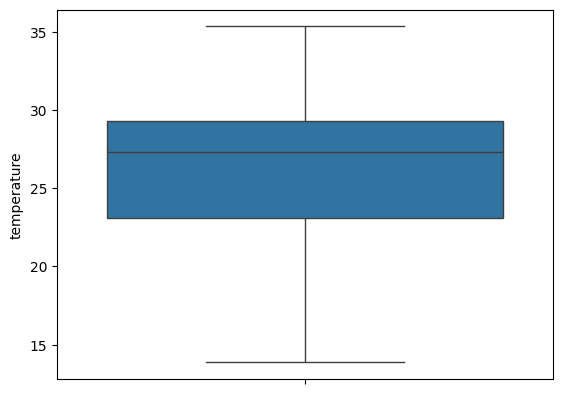

Outlier counter and percentage for temperature: (0, 0.0)


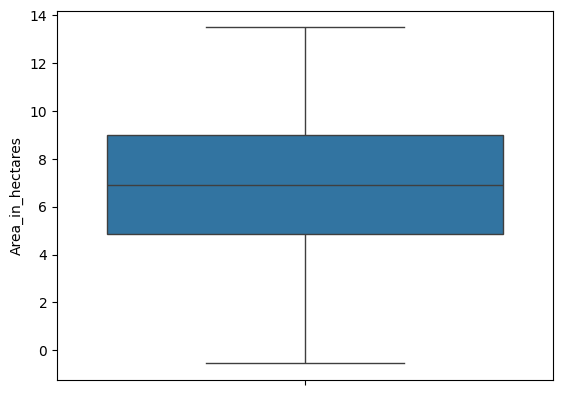

Outlier counter and percentage for Area_in_hectares: (0, 0.0)


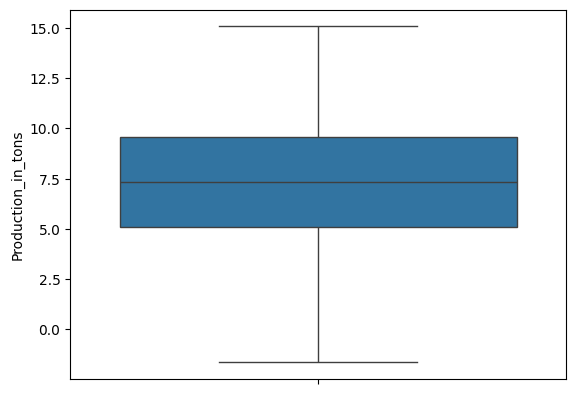

Outlier counter and percentage for Production_in_tons: (0, 0.0)


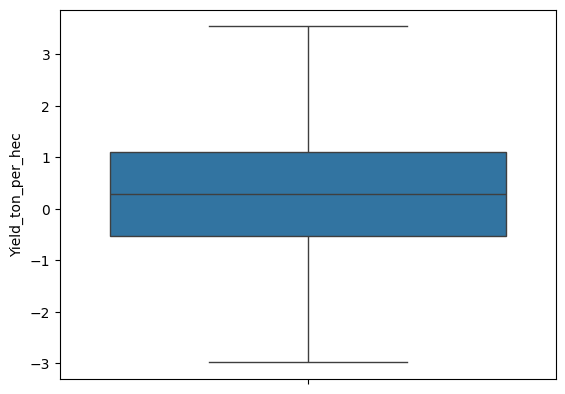

Outlier counter and percentage for Yield_ton_per_hec: (0, 0.0)


In [6]:
df["Area_in_hectares"] = np.log(df["Area_in_hectares"])
df["Production_in_tons"] = np.log(df["Production_in_tons"])
df["Yield_ton_per_hec"] = np.log(df["Yield_ton_per_hec"])


df = outlier_remover(df,"N")
df = outlier_remover(df,"P")
df = outlier_remover(df,"K")
df = outlier_remover(df,"pH")
df = outlier_remover(df,"rainfall")
df = outlier_remover(df,"temperature")
df = outlier_remover(df,"Area_in_hectares")
df = outlier_remover(df,"Production_in_tons")
df = outlier_remover(df,"Yield_ton_per_hec")

for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(df[i])
        plt.show()
        print(f"Outlier counter and percentage for {i}: {outlier_info(df, i)}")


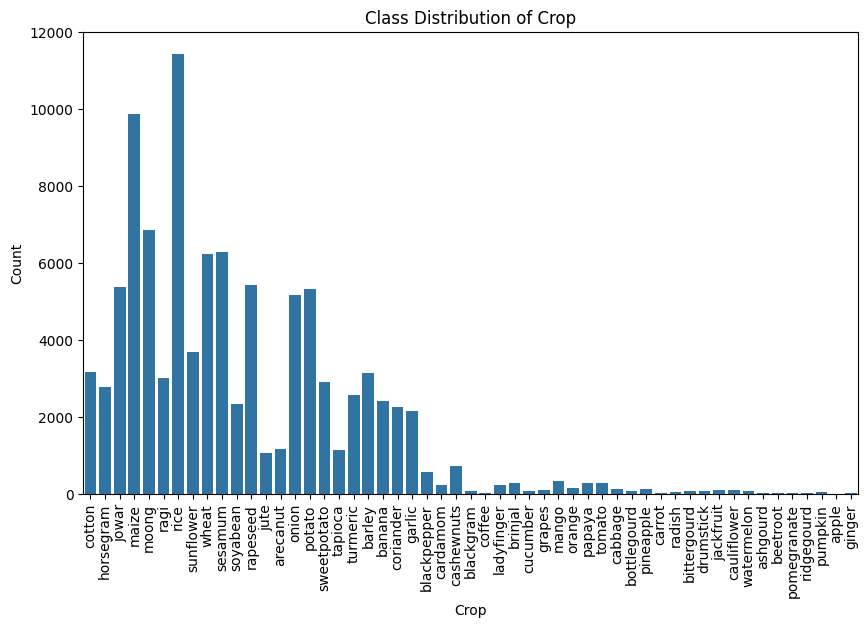

In [7]:

# Plotting the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Crop'])
plt.title('Class Distribution of Crop')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [8]:
tt = df["Crop"].value_counts()
print(tt)
df = df[df["Crop"] != "apple"]
df = df[df["Crop"] != "coffee"]
tt = df["Crop"].value_counts()
print(tt)

Crop
rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
cucumber          72
bittergourd       67
watermelon        59
blackgram         58
bottlegourd       58
radish            45
pumpkin           37
carrot            28
ashgourd          28
pomegran

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

C = ["State_Name","Crop_Type","Crop"]
le_D = {}
for i in C:
    le_D[i] = LabelEncoder()
    df[i] = le_D[i].fit_transform(df[i])

bulk_scaler = StandardScaler()
features_to_scale = ["State_Name","Crop_Type","N","P","K","pH","rainfall","temperature","Area_in_hectares","Production_in_tons","Yield_ton_per_hec"]
#features_to_scale = ["N","P","K","pH","rainfall","temperature","Area_in_hectares","Yield_ton_per_hec"]
df[features_to_scale] = bulk_scaler.fit_transform(df[features_to_scale])

df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 99840 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99840 non-null  float64
 1   Crop_Type           99840 non-null  float64
 2   Crop                99840 non-null  int32  
 3   N                   99840 non-null  float64
 4   P                   99840 non-null  float64
 5   K                   99840 non-null  float64
 6   pH                  99840 non-null  float64
 7   rainfall            99840 non-null  float64
 8   temperature         99840 non-null  float64
 9   Area_in_hectares    99840 non-null  float64
 10  Production_in_tons  99840 non-null  float64
 11  Yield_ton_per_hec   99840 non-null  float64
dtypes: float64(11), int32(1)
memory usage: 9.5 MB


State_Name               33
Crop_Type                 4
Crop                     51
N                        14
P                        12
K                        12
pH                       82
rainfall                107
temperature             105
Area_in_hectares      26342
Production_in_tons    33212
Yield_ton_per_hec     71528
dtype: int64

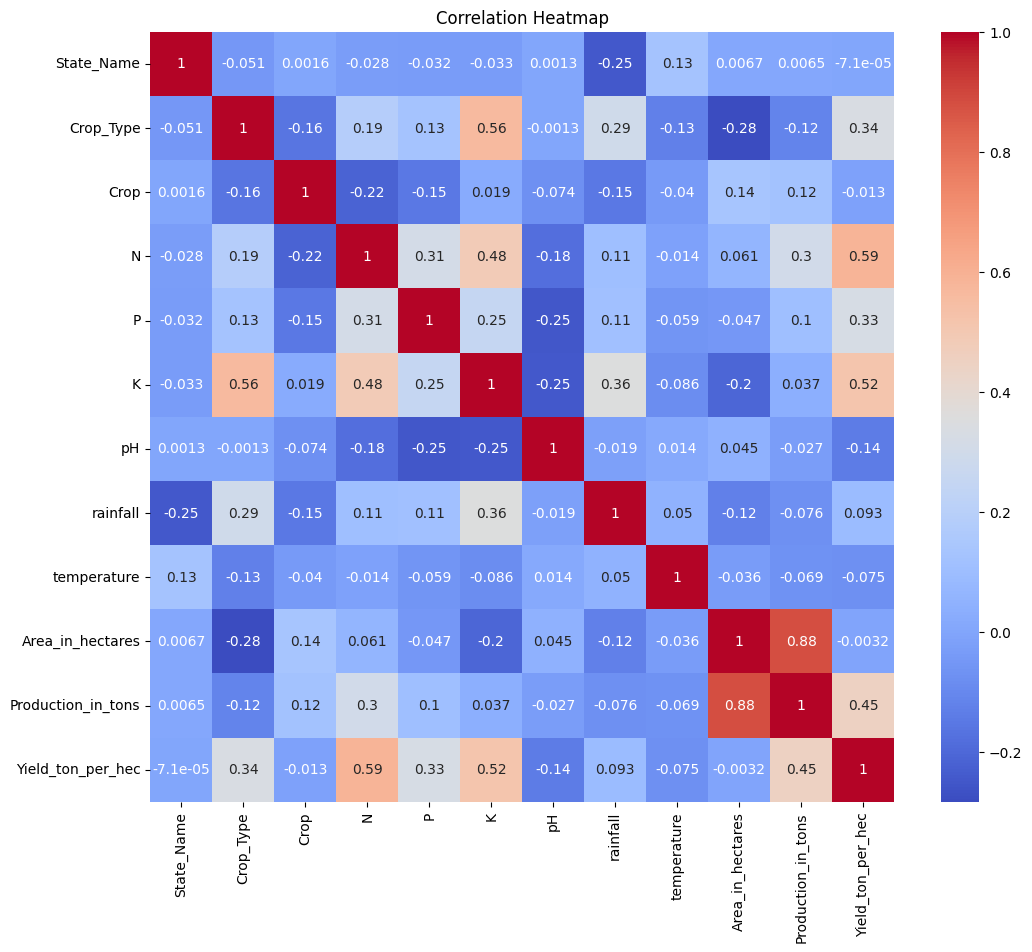

In [10]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
from sklearn.decomposition import PCA

t = df[["Production_in_tons","Area_in_hectares"]].values
pca = PCA(n_components=1)
X_pca = pca.fit_transform(t)

df = df.drop(["Production_in_tons","Area_in_hectares","Yield_ton_per_hec"],axis=1)
df["PCA"] = X_pca

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99840 entries, 0 to 99848
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State_Name   99840 non-null  float64
 1   Crop_Type    99840 non-null  float64
 2   Crop         99840 non-null  int32  
 3   N            99840 non-null  float64
 4   P            99840 non-null  float64
 5   K            99840 non-null  float64
 6   pH           99840 non-null  float64
 7   rainfall     99840 non-null  float64
 8   temperature  99840 non-null  float64
 9   PCA          99840 non-null  float64
dtypes: float64(9), int32(1)
memory usage: 8.0 MB


In [12]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split,TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
from collections import Counter
from imblearn.over_sampling import *
data = df

In [13]:
class CropRecommendationModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(CropRecommendationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,32)
        self.sigmoid = nn.Sigmoid()
        self.fc4 = nn.Linear(32, num_classes)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [14]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA,IncrementalPCA
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.manifold import TSNE
import shap
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.calibration import calibration_curve
from scipy.interpolate import make_interp_spline

def plot_tsne_pca(features, targets, target_names,name,sample_size=2000):
    # Subsample the data for faster computation
    if len(features) > sample_size:
        idx = np.random.choice(len(features), sample_size, replace=False)
        features_sampled = features[idx]
        targets_sampled = targets[idx]
    else:
        features_sampled = features
        targets_sampled = targets

    # TSNE
    tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
    tsne_results = tsne.fit_transform(features_sampled)
    
    for i, target_name in enumerate(target_names):
        plt.scatter(tsne_results[targets_sampled == i, 0], tsne_results[targets_sampled == i, 1], label=le_D["Crop"].inverse_transform([target_name])[0], s=10)
    plt.title("t-SNE")
    plt.grid()
    #plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    # plt.show()
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.savefig(f'../Results/{name}_tsne.png', bbox_inches='tight')
    plt.close()
    fig_legend = plt.figure(figsize=(10, 10))
    legend = plt.figlegend(handles, labels, loc='center', ncol=10)
    for label in legend.get_texts():
        label.set_ha('right')
    fig_legend.savefig(f'../Results/{name}_tsne_legend.png', bbox_inches='tight')
    plt.close()
    from IPython.display import Image, display
    display(Image(f'../Results/{name}_tsne.png'))
    display(Image(f'../Results/{name}_tsne_legend.png'))
    
    # PCA
    pca = IncrementalPCA(n_components=2)
    pca_results = pca.fit_transform(features_sampled)
    
    for i, target_name in enumerate(target_names):
        plt.scatter(pca_results[targets_sampled == i, 0], pca_results[targets_sampled == i, 1], label=le_D["Crop"].inverse_transform([target_name])[0], s=10)
    plt.title("PCA")
    plt.grid()
    # plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    # plt.show()
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.savefig(f'../Results/{name}_pca.png', bbox_inches='tight')
    plt.close()
    fig_legend = plt.figure(figsize=(10, 10))
    legend = plt.figlegend(handles, labels, loc='center', ncol=10)
    for label in legend.get_texts():
        label.set_ha('right')
    fig_legend.savefig(f'../Results/{name}_pca_legend.png', bbox_inches='tight')
    plt.close()
    from IPython.display import Image, display
    display(Image(f'../Results/{name}_pca.png'))
    display(Image(f'../Results/{name}_pca_legend.png'))

def plot_radar_chart(metrics_df,name):
    labels = metrics_df['Class']
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    for metric in metrics_df.columns[1:]:
        values = metrics_df[metric].tolist()
        values += values[:1]
        ax.plot(angles, values, label=metric)
        ax.fill(angles, values, alpha=0.1)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Metrics Radar Chart')
    plt.savefig(f"../Results/{name}_radar_chart.png")
    plt.show()
    
def compute_metrics(val_target, val_predicted, num_classes):
    precision, recall, f1, _ = precision_recall_fscore_support(val_target, val_predicted, average=None, labels=range(num_classes),zero_division=1)
    metrics = {
        'Class': range(num_classes),
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    return pd.DataFrame(metrics)

def train_validation(train_features, test_features, train_target, test_target,name,num_epochs=1100):

    input_size = train_features.shape[1]
    hidden_size = 64
    num_classes = len(data['Crop'].unique())

    model = CropRecommendationModel(input_size, hidden_size, num_classes).to("cuda")
    #model = torch.compile(model)
    # num_epochs = 1100
    learning_rate = 0.001
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []


    for epoch in range(num_epochs):
        # Training
        model.train()
        outputs = model(train_features)
        loss = criterion(outputs, train_target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())

        with torch.no_grad():
            _, train_predicted = torch.max(outputs.data, 1)
            train_correct = (train_predicted == train_target).sum().item()
            train_accuracy = train_correct / train_target.size(0)
            train_accuracies.append(train_accuracy)

        # Validation
        model.eval()
        with torch.no_grad():
            test_outputs = model(test_features)
            test_loss = criterion(test_outputs, test_target)
            _, test_predicted = torch.max(test_outputs.data, 1)
            test_correct = (test_predicted == test_target).sum().item()
            test_accuracy = test_correct / test_target.size(0)
            test_losses.append(test_loss.item())
            test_accuracies.append(test_accuracy)

    # Plotting all graphs in a single figure
    
    # Loss and Accuracy Graphs
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label='Train Loss', color="orange")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Epoch vs Loss Plot")
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), test_losses, label='Val Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Validation Epoch vs Loss Plot")
    plt.legend()
    plt.grid()
    plt.savefig(f'../Results/{name}_loss_plot.png')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy', color="orange")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Epoch vs Accuracy Plot")
    plt.legend()
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), test_accuracies, label='Val Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Validation Epoch vs Accuracy Plot")
    plt.legend()
    plt.grid()
    plt.savefig(f'../Results/{name}_accu_plot.png')
    plt.show()
    
    model.eval()
    with torch.no_grad():
        outputs = model(test_features)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = (predicted == test_target).sum().item() / test_target.size(0)

    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    all_metrics = []
    fold_metrics = compute_metrics(test_target.cpu().numpy(), test_predicted.cpu().numpy(), num_classes)
    all_metrics.append(fold_metrics)
    avg_metrics = pd.concat(all_metrics).groupby('Class').mean().reset_index()
    avg_metrics['Class'] = le_D['Crop'].inverse_transform(avg_metrics['Class'].astype(int))
    plot_radar_chart(avg_metrics,name)
    
    val_target_onehot = nn.functional.one_hot(test_target, num_classes=num_classes).cpu().numpy()
    roc_auc_dict = {}

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(val_target_onehot[:, i], test_outputs.cpu().numpy()[:, i])
        roc_auc_dict[i] = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {le_D["Crop"].inverse_transform([i])[0]} (area = {roc_auc_dict[i]:0.2f})')

    # Plot diagonal line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid()

    # Capture the legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()

    # Save the ROC curve plot without the legend
    plt.savefig(f'../Results/{name}_roc_curve.png', bbox_inches='tight')
    plt.close()

    # Create a new figure for the legend
    fig_legend = plt.figure(figsize=(8, 6))
    plt.axis('off')
    legend = plt.figlegend(handles, labels, loc='center', ncol=5)
    for label in legend.get_texts():
        label.set_ha('right')
    fig_legend.savefig(f'../Results/{name}_roc_curve_legend.png', bbox_inches='tight')
    plt.close()

    # Show ROC curve and legend separately
    from IPython.display import Image, display
    display(Image(f'../Results/{name}_roc_curve.png'))
    display(Image(f'../Results/{name}_roc_curve_legend.png'))


    plot_tsne_pca(train_features.cpu(), train_target.cpu(), target_names=data['Crop'].unique(),name=name)
    return model, criterion

def cross_check(features, target, name, k=10, num_epochs=1100):
    learning_rate = 0.001
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_results = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(features)):
        train_features, val_features = features[train_idx], features[val_idx]
        train_target, val_target = target[train_idx], target[val_idx]
        input_size = train_features.shape[1]
        hidden_size = 64
        num_classes = len(data['Crop'].unique())

        model = CropRecommendationModel(input_size, hidden_size, num_classes).to("cuda")
        #model = torch.compile(model)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        xt = []
        train_losses = []
        val_losses = []

        for epoch in range(num_epochs):
            model.train()
            outputs = model(train_features)
            loss = criterion(outputs, train_target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            xt.append(epoch)
            train_losses.append(loss.item())

            model.eval()
            with torch.no_grad():
                val_outputs = model(val_features)
                val_loss = criterion(val_outputs, val_target)
                val_losses.append(val_loss.item())

        if fold == 0:
            xt = np.array(xt)
            train_losses = np.array(train_losses)
            val_losses = np.array(val_losses)
            plt.plot(xt, train_losses, label='Train Loss')
            plt.plot(xt, val_losses, label='Validation Loss')
            plt.xlabel("Epochs")
            plt.grid()
            plt.ylabel("Loss")
            plt.title("Epoch vs Loss Plot for Fold 1")
            plt.legend()
            plt.show()
            print(f'Epoch [{xt[-1]+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}')

        model.eval()
        with torch.no_grad():
            train_outputs = model(train_features)
            train_loss = criterion(train_outputs, train_target)
            _, train_predicted = torch.max(train_outputs.data, 1)
            train_correct = (train_predicted == train_target).sum().item()
            train_accuracy = train_correct / train_target.size(0)

            val_outputs = model(val_features)
            val_loss = criterion(val_outputs, val_target)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_correct = (val_predicted == val_target).sum().item()
            val_accuracy = val_correct / val_target.size(0)

            # Compute additional metrics
            train_precision = precision_score(train_target.cpu(), train_predicted.cpu(), average='weighted',zero_division=0)
            train_recall = recall_score(train_target.cpu(), train_predicted.cpu(), average='weighted',zero_division=0)
            #train_recall_ng = recall_score(train_target.cpu(), train_predicted.cpu(), average='weighted',zero_division=0,pos_label=0)
            train_f1 = f1_score(train_target.cpu(), train_predicted.cpu(), average='weighted',zero_division=0)

            val_precision = precision_score(val_target.cpu(), val_predicted.cpu(), average='weighted',zero_division=0)
            val_recall = recall_score(val_target.cpu(), val_predicted.cpu(), average='weighted',zero_division=0)
            #val_recall_ng = recall_score(val_target.cpu(), val_predicted.cpu(), average='weighted',zero_division=0,pos_label=0)
            val_f1 = f1_score(val_target.cpu(), val_predicted.cpu(), average='weighted',zero_division=0)
            
            conf_mat_train = confusion_matrix(train_target.cpu(), train_predicted.cpu())
            conf_mat_val = confusion_matrix(val_target.cpu(), val_predicted.cpu())
            tnr_per_class_train = []
            tnr_per_class_val = []
            for i in range(len(conf_mat_train)):
                tn = np.sum(np.delete(np.delete(conf_mat_train, i, axis=0), i, axis=1))
                fp = np.sum(np.delete(conf_mat_train[:, i], i))
                tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
                tnr_per_class_train.append(tnr)
            for i in range(len(conf_mat_val)):
                tn = np.sum(np.delete(np.delete(conf_mat_val, i, axis=0), i, axis=1))
                fp = np.sum(np.delete(conf_mat_val[:, i], i))
                tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
                tnr_per_class_val.append(tnr)
            
            train_tnr = np.mean(tnr_per_class_train)
            val_tnr = np.mean(tnr_per_class_val)
            
        fold_results.append({
            'fold': fold+1,
            'train_loss': train_loss.item(),
            'train_accuracy': train_accuracy,
            'val_loss': val_loss.item(),
            'val_accuracy': val_accuracy,
            'train_precision': train_precision,
            'train_recall': train_recall,
            'train_tnr': train_tnr,
            'train_f1': train_f1,
            'val_precision': val_precision,
            'val_recall': val_recall,
            'val_tnr': val_tnr,
            'val_f1': val_f1
        })
        print(f'Fold {fold+1}, Train Loss: {train_loss.item()}, Train Accuracy: {train_accuracy*100:.2f}%, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy*100:.2f}%')
        print(f'Fold {fold+1}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f},Train Negative Rate: {train_tnr:.4f} ,Train F1: {train_f1:.4f}')
        print(f'Fold {fold+1}, Validation Precision: {val_precision:.4f}, Validation Recall: {val_recall:.4f},Validation Negative Rate: {val_tnr:.4f} ,Validation F1: {val_f1:.4f}')

    # Visualization of k-fold cross-validation results
    train_losses = [result['train_loss'] for result in fold_results]
    val_losses = [result['val_loss'] for result in fold_results]
    train_accuracies = [result['train_accuracy'] for result in fold_results]
    val_accuracies = [result['val_accuracy'] for result in fold_results]
    train_precisions = [result['train_precision'] for result in fold_results]
    val_precisions = [result['val_precision'] for result in fold_results]
    train_recalls = [result['train_recall'] for result in fold_results]
    val_recalls = [result['val_recall'] for result in fold_results]
    train_f1s = [result['train_f1'] for result in fold_results]
    val_f1s = [result['val_f1'] for result in fold_results]
    train_tnrs = [result['train_tnr'] for result in fold_results]
    val_tnrs = [result['val_tnr'] for result in fold_results]

    avg_train_loss = np.mean(train_losses)
    avg_val_loss = np.mean(val_losses)
    avg_train_accuracy = np.mean(train_accuracies)
    avg_val_accuracy = np.mean(val_accuracies)
    avg_train_precision = np.mean(train_precisions)
    avg_val_precision = np.mean(val_precisions)
    avg_train_recall = np.mean(train_recalls)
    avg_val_recall = np.mean(val_recalls)
    avg_train_f1 = np.mean(train_f1s)
    avg_val_f1 = np.mean(val_f1s)
    avg_train_tnr = np.mean(train_tnrs)
    avg_val_tnr = np.mean(val_tnrs)
    
    avg_results = {
            'fold': "Average",
            'train_loss': avg_train_loss,
            'train_accuracy': avg_train_accuracy,
            'val_loss': avg_val_loss,
            'val_accuracy': avg_val_accuracy,
            'train_precision': avg_train_precision,
            'train_recall': avg_train_recall,
            'train_tnr': avg_train_tnr,
            'train_f1': avg_train_f1,
            'val_precision': avg_val_precision,
            'val_recall': avg_val_recall,
            'val_tnr': avg_val_tnr,
            'val_f1': avg_val_f1
        }
    
    fold_results.append(avg_results)
    results_df = pd.DataFrame(fold_results)

    def smooth_curve(x, y):
        x_smooth = np.linspace(min(x), max(x), 300)
        spl = make_interp_spline(x, y, k=3)
        y_smooth = spl(x_smooth)
        return x_smooth, y_smooth

    plt.figure(figsize=(20, 16))

    # Plotting losses for each fold
    plt.subplot(6, 1, 1)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_losses)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Loss')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_losses)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Loss')
    plt.xlabel("Fold")
    plt.ylabel("Loss")
    plt.title("Loss per Fold")
    plt.grid()
    plt.legend()

    # Plotting accuracies for each fold
    plt.subplot(6, 1, 2)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_accuracies)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Accuracy')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_accuracies)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Accuracy')
    plt.xlabel("Fold")
    plt.ylabel("Accuracy")
    plt.title("Accuracy per Fold")
    plt.grid()
    plt.legend()

    # Plotting precision for each fol6
    plt.subplot(6, 1, 3)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_precisions)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Precision')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_precisions)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Precision')
    plt.xlabel("Fold")
    plt.ylabel("Precision")
    plt.title("Precision per Fold")
    plt.grid()
    plt.legend()

    # Plotting recall for each fold
    plt.subplot(6, 1, 4)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_recalls)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Recall')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_recalls)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Recall')
    plt.xlabel("Fold")
    plt.ylabel("Recall")
    plt.title("Recall per Fold")
    plt.grid()
    plt.legend()
    
    plt.subplot(6, 1, 5)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_tnrs)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train Negative Rate')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_tnrs)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation Negative Rate')
    plt.xlabel("Fold")
    plt.ylabel("Recall")
    plt.title("Recall per Fold")
    plt.grid()
    plt.legend()


    # Plotting F1 score for each fold
    plt.subplot(6, 1, 6)
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), train_f1s)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='b', label='Train F1')
    x_smooth, y_smooth = smooth_curve(range(1, k + 1), val_f1s)
    plt.plot(x_smooth, y_smooth, marker='', linestyle='-', color='r', label='Validation F1')
    plt.xlabel("Fold")
    plt.ylabel("F1 Score")
    plt.title("F1 Score per Fold")
    plt.grid()
    plt.legend()


    plt.tight_layout()
    plt.savefig(f'../Results/{name}_Xvalidation_plot.png')
    plt.show()

    print(f'Average Train Loss: {avg_train_loss:.4f}')
    print(f'Average Validation Loss: {avg_val_loss:.4f}')
    print(f'Average Train Accuracy: {avg_train_accuracy:.4f}')
    print(f'Average Validation Accuracy: {avg_val_accuracy:.4f}')
    print(f'Average Train Precision: {avg_train_precision:.4f}')
    print(f'Average Validation Precision: {avg_val_precision:.4f}')
    print(f'Average Train Recall: {avg_train_recall:.4f}')
    print(f'Average Validation Recall: {avg_val_recall:.4f}')
    print(f'Average Train Negative Rate: {avg_train_tnr:.4f}')
    print(f'Average Validation Negative Rate: {avg_val_tnr:.4f}')
    print(f'Average Train F1: {avg_train_f1:.4f}')
    print(f'Average Validation F1: {avg_val_f1:.4f}')
    
    return results_df

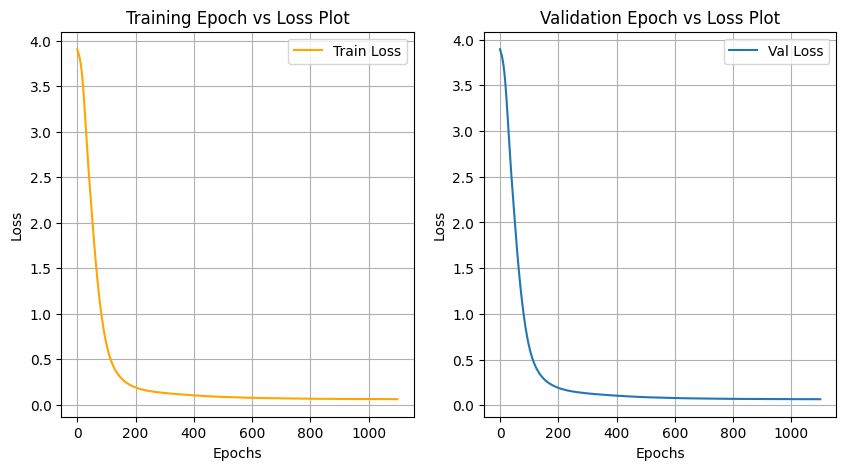

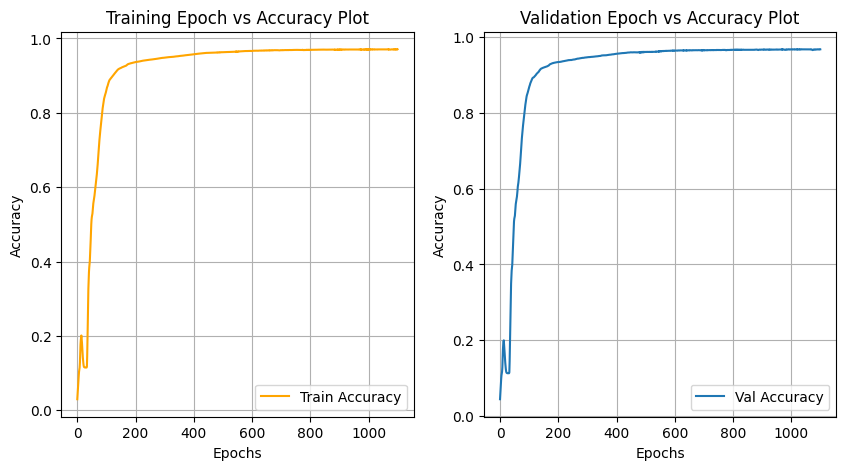

Test Accuracy: 96.82%


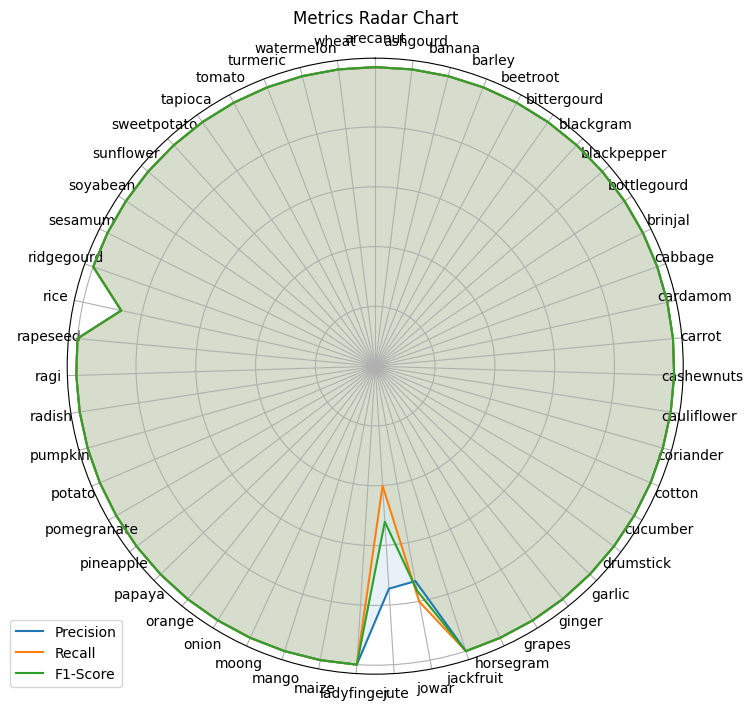

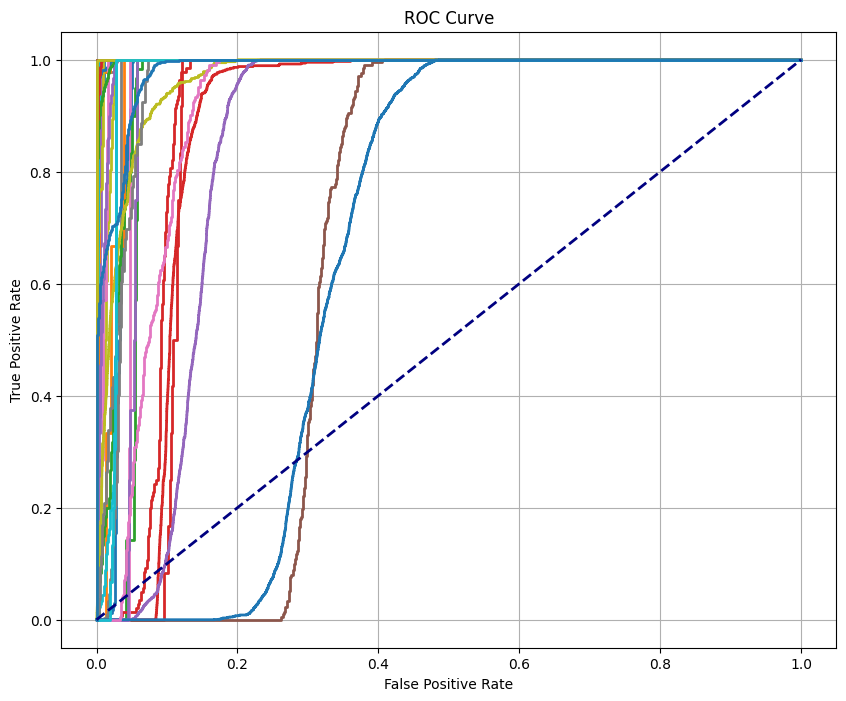

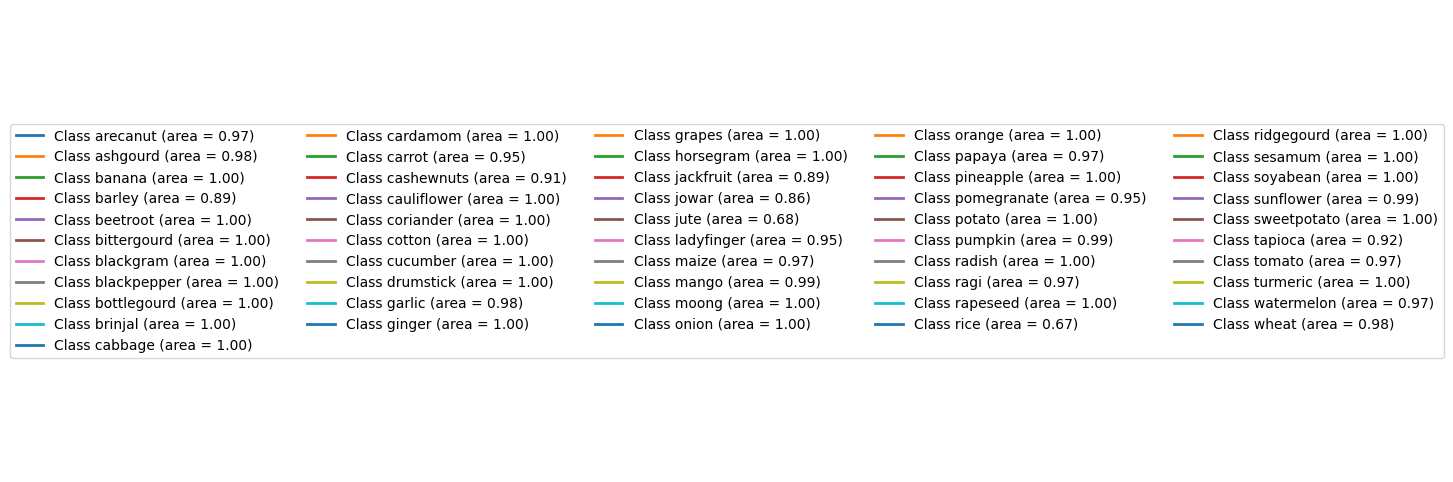

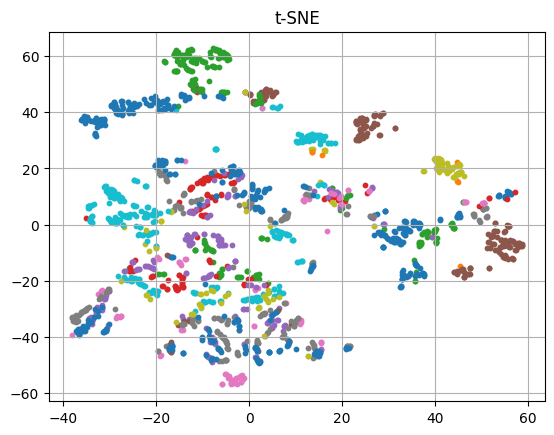

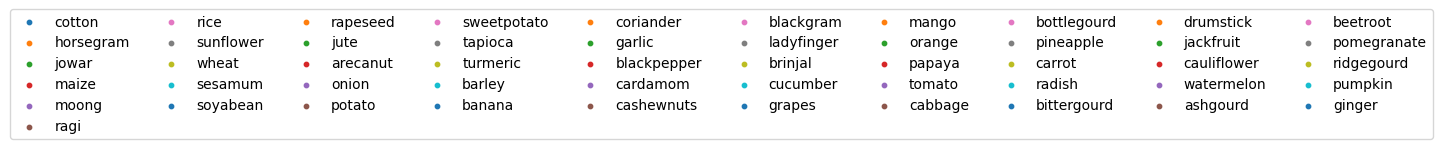

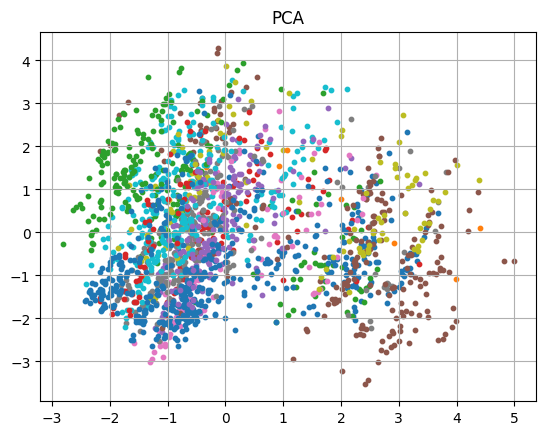

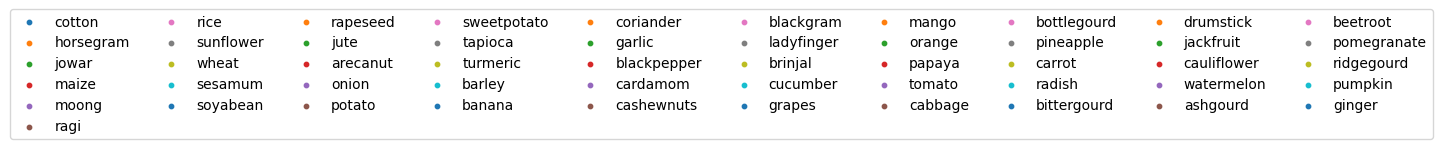

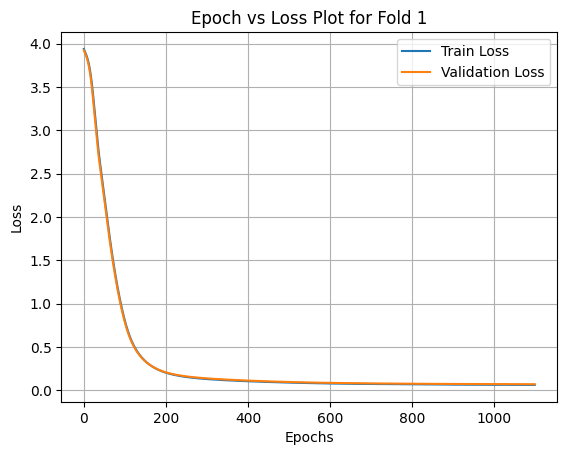

Epoch [1100/1100], Train Loss: 0.0620, Validation Loss: 0.0701
Fold 1, Train Loss: 0.06200888752937317, Train Accuracy: 97.01%, Validation Loss: 0.07007249444723129, Validation Accuracy: 96.61%
Fold 1, Train Precision: 0.9705, Train Recall: 0.9701,Train Negative Rate: 0.9994 ,Train F1: 0.9697
Fold 1, Validation Precision: 0.9671, Validation Recall: 0.9661,Validation Negative Rate: 0.9993 ,Validation F1: 0.9658
Fold 2, Train Loss: 0.06292637437582016, Train Accuracy: 97.09%, Validation Loss: 0.06685802340507507, Validation Accuracy: 96.86%
Fold 2, Train Precision: 0.9712, Train Recall: 0.9709,Train Negative Rate: 0.9994 ,Train F1: 0.9705
Fold 2, Validation Precision: 0.9700, Validation Recall: 0.9686,Validation Negative Rate: 0.9993 ,Validation F1: 0.9681
Fold 3, Train Loss: 0.062368154525756836, Train Accuracy: 96.98%, Validation Loss: 0.06598364561796188, Validation Accuracy: 96.95%
Fold 3, Train Precision: 0.9711, Train Recall: 0.9698,Train Negative Rate: 0.9994 ,Train F1: 0.9697
Fol

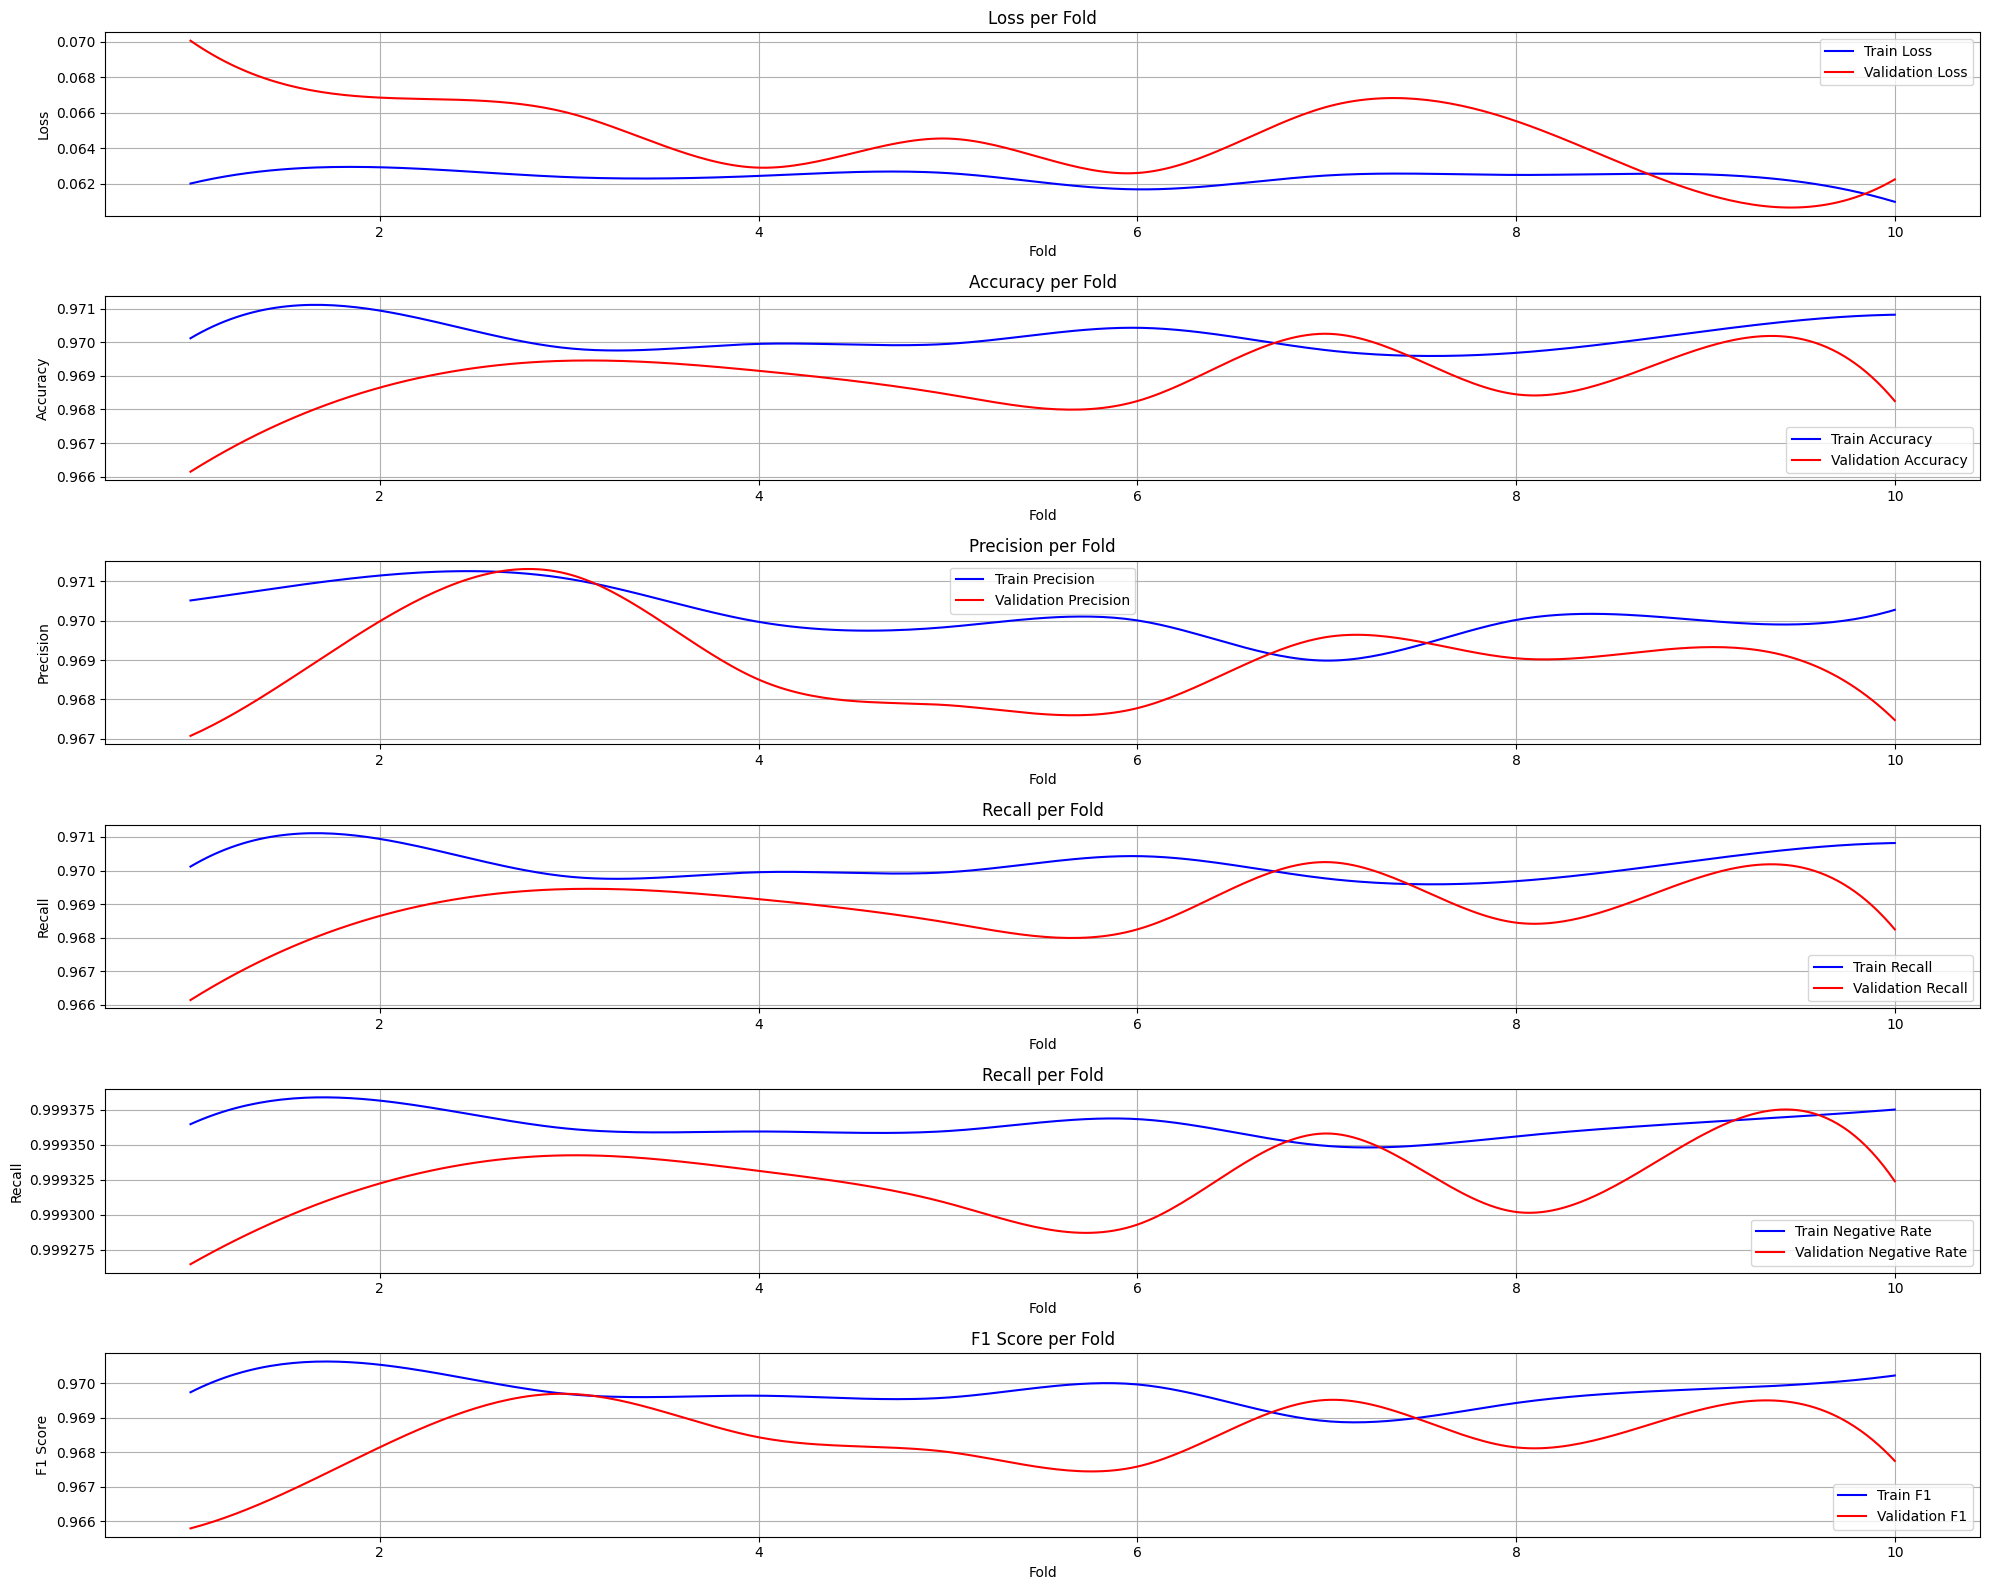

Average Train Loss: 0.0622
Average Validation Loss: 0.0649
Average Train Accuracy: 0.9702
Average Validation Accuracy: 0.9687
Average Train Precision: 0.9702
Average Validation Precision: 0.9688
Average Train Recall: 0.9702
Average Validation Recall: 0.9687
Average Train Negative Rate: 0.9994
Average Validation Negative Rate: 0.9993
Average Train F1: 0.9698
Average Validation F1: 0.9682


In [15]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek,SMOTEENN

features = data.drop(columns=['Crop']).values
target = data['Crop'].values


features = torch.tensor(features, dtype=torch.float32).float().to("cuda")
target = torch.tensor(target, dtype=torch.long).long().to("cuda")
name = f"{model_name}_Simple"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model,criterion = train_validation(train_features, test_features, train_target, test_target,name)
df1 = cross_check(features,target,name)


Random OverSampler


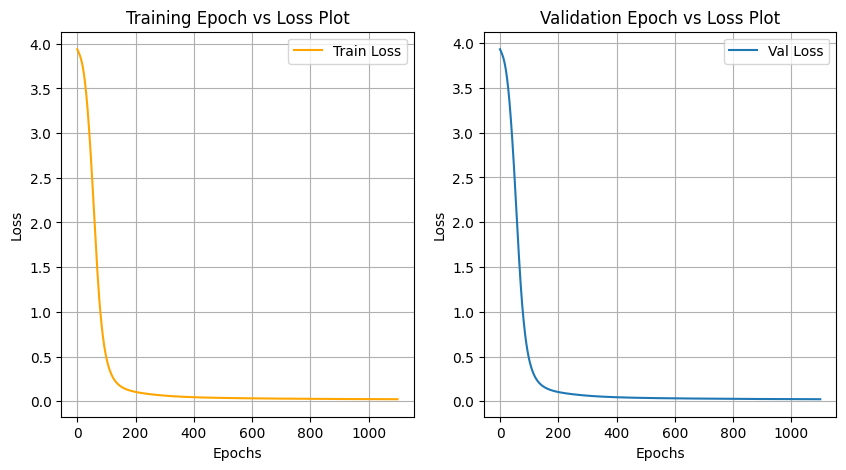

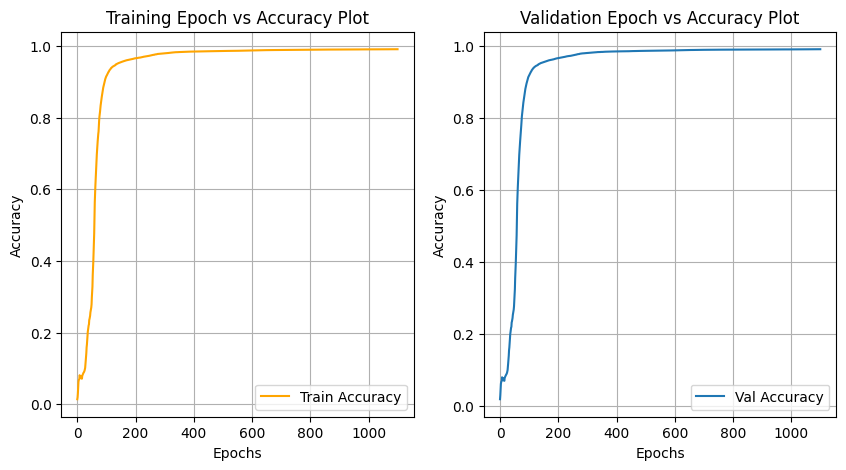

Test Accuracy: 99.05%


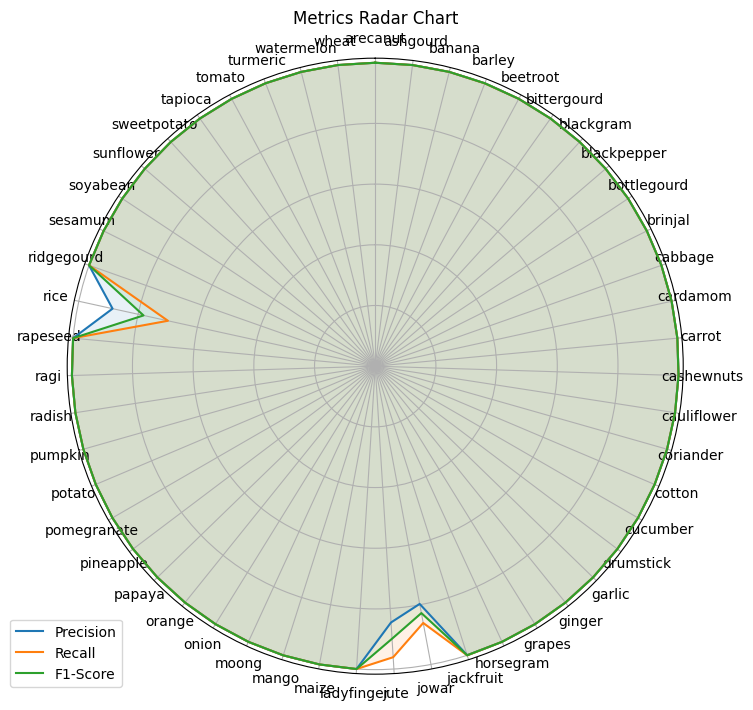

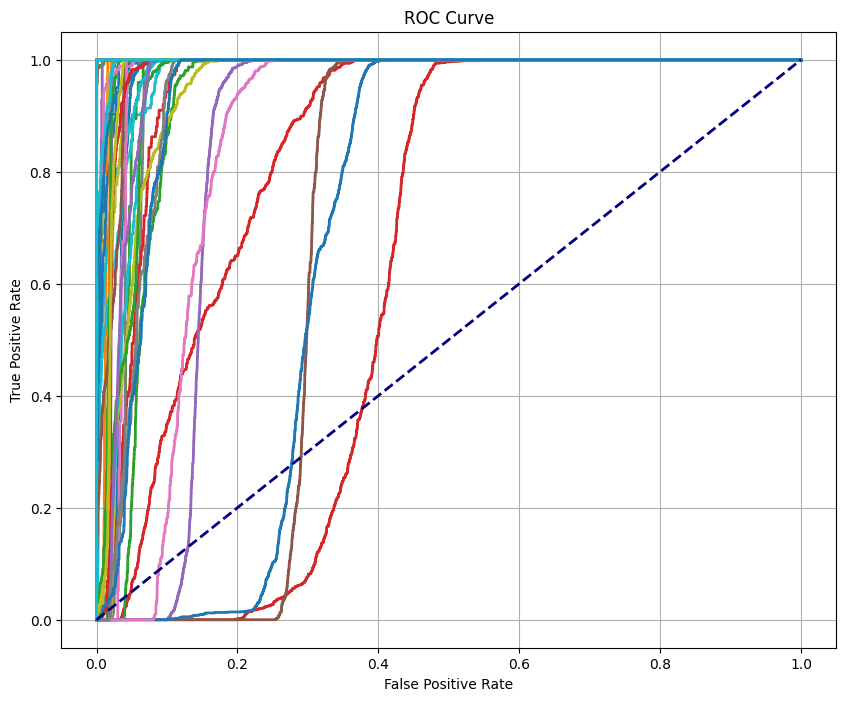

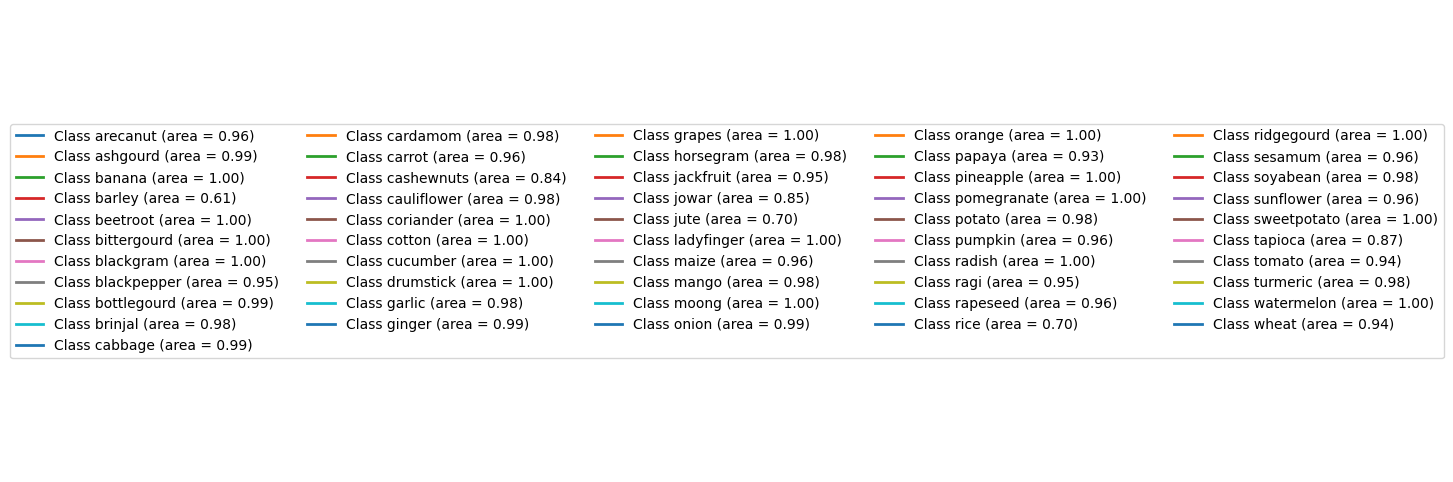

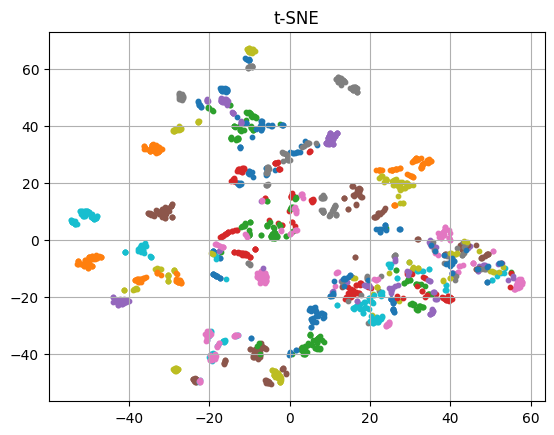

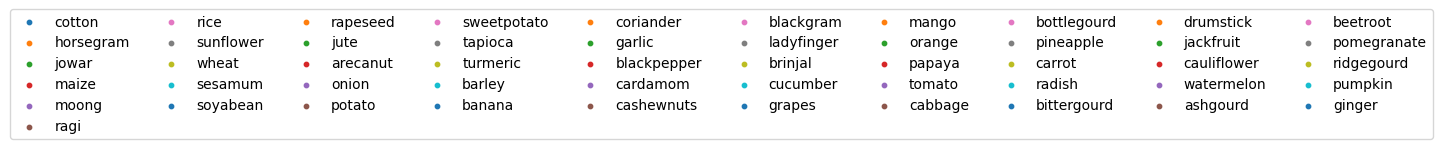

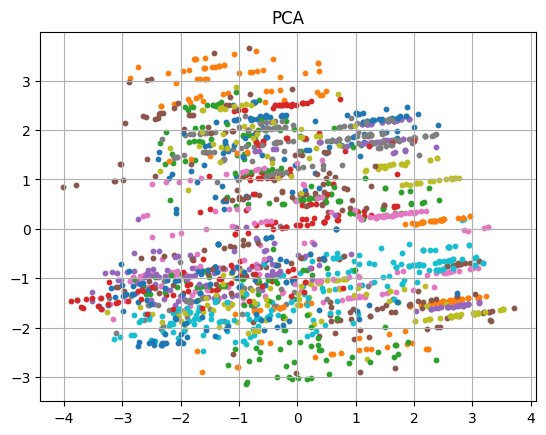

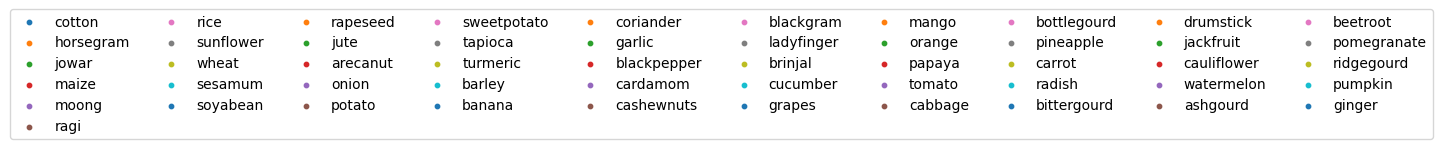

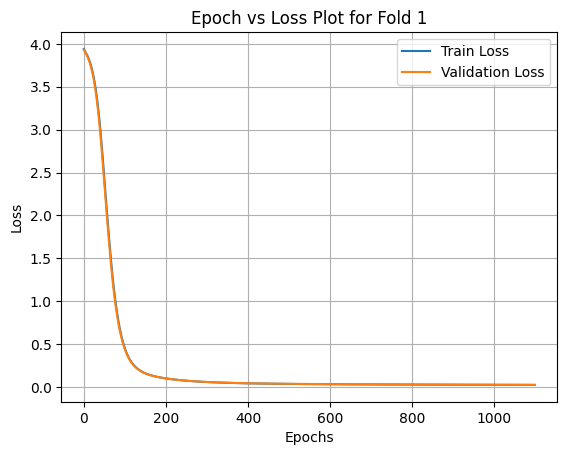

Epoch [1100/1100], Train Loss: 0.0233, Validation Loss: 0.0244
Fold 1, Train Loss: 0.023247191682457924, Train Accuracy: 99.09%, Validation Loss: 0.024357302114367485, Validation Accuracy: 99.04%
Fold 1, Train Precision: 0.9912, Train Recall: 0.9909,Train Negative Rate: 0.9998 ,Train F1: 0.9908
Fold 1, Validation Precision: 0.9908, Validation Recall: 0.9904,Validation Negative Rate: 0.9998 ,Validation F1: 0.9902
Fold 2, Train Loss: 0.022629283368587494, Train Accuracy: 99.10%, Validation Loss: 0.023025991395115852, Validation Accuracy: 99.10%
Fold 2, Train Precision: 0.9912, Train Recall: 0.9910,Train Negative Rate: 0.9998 ,Train F1: 0.9908
Fold 2, Validation Precision: 0.9911, Validation Recall: 0.9910,Validation Negative Rate: 0.9998 ,Validation F1: 0.9909
Fold 3, Train Loss: 0.02290789783000946, Train Accuracy: 99.09%, Validation Loss: 0.02358861267566681, Validation Accuracy: 99.09%
Fold 3, Train Precision: 0.9913, Train Recall: 0.9909,Train Negative Rate: 0.9998 ,Train F1: 0.9907


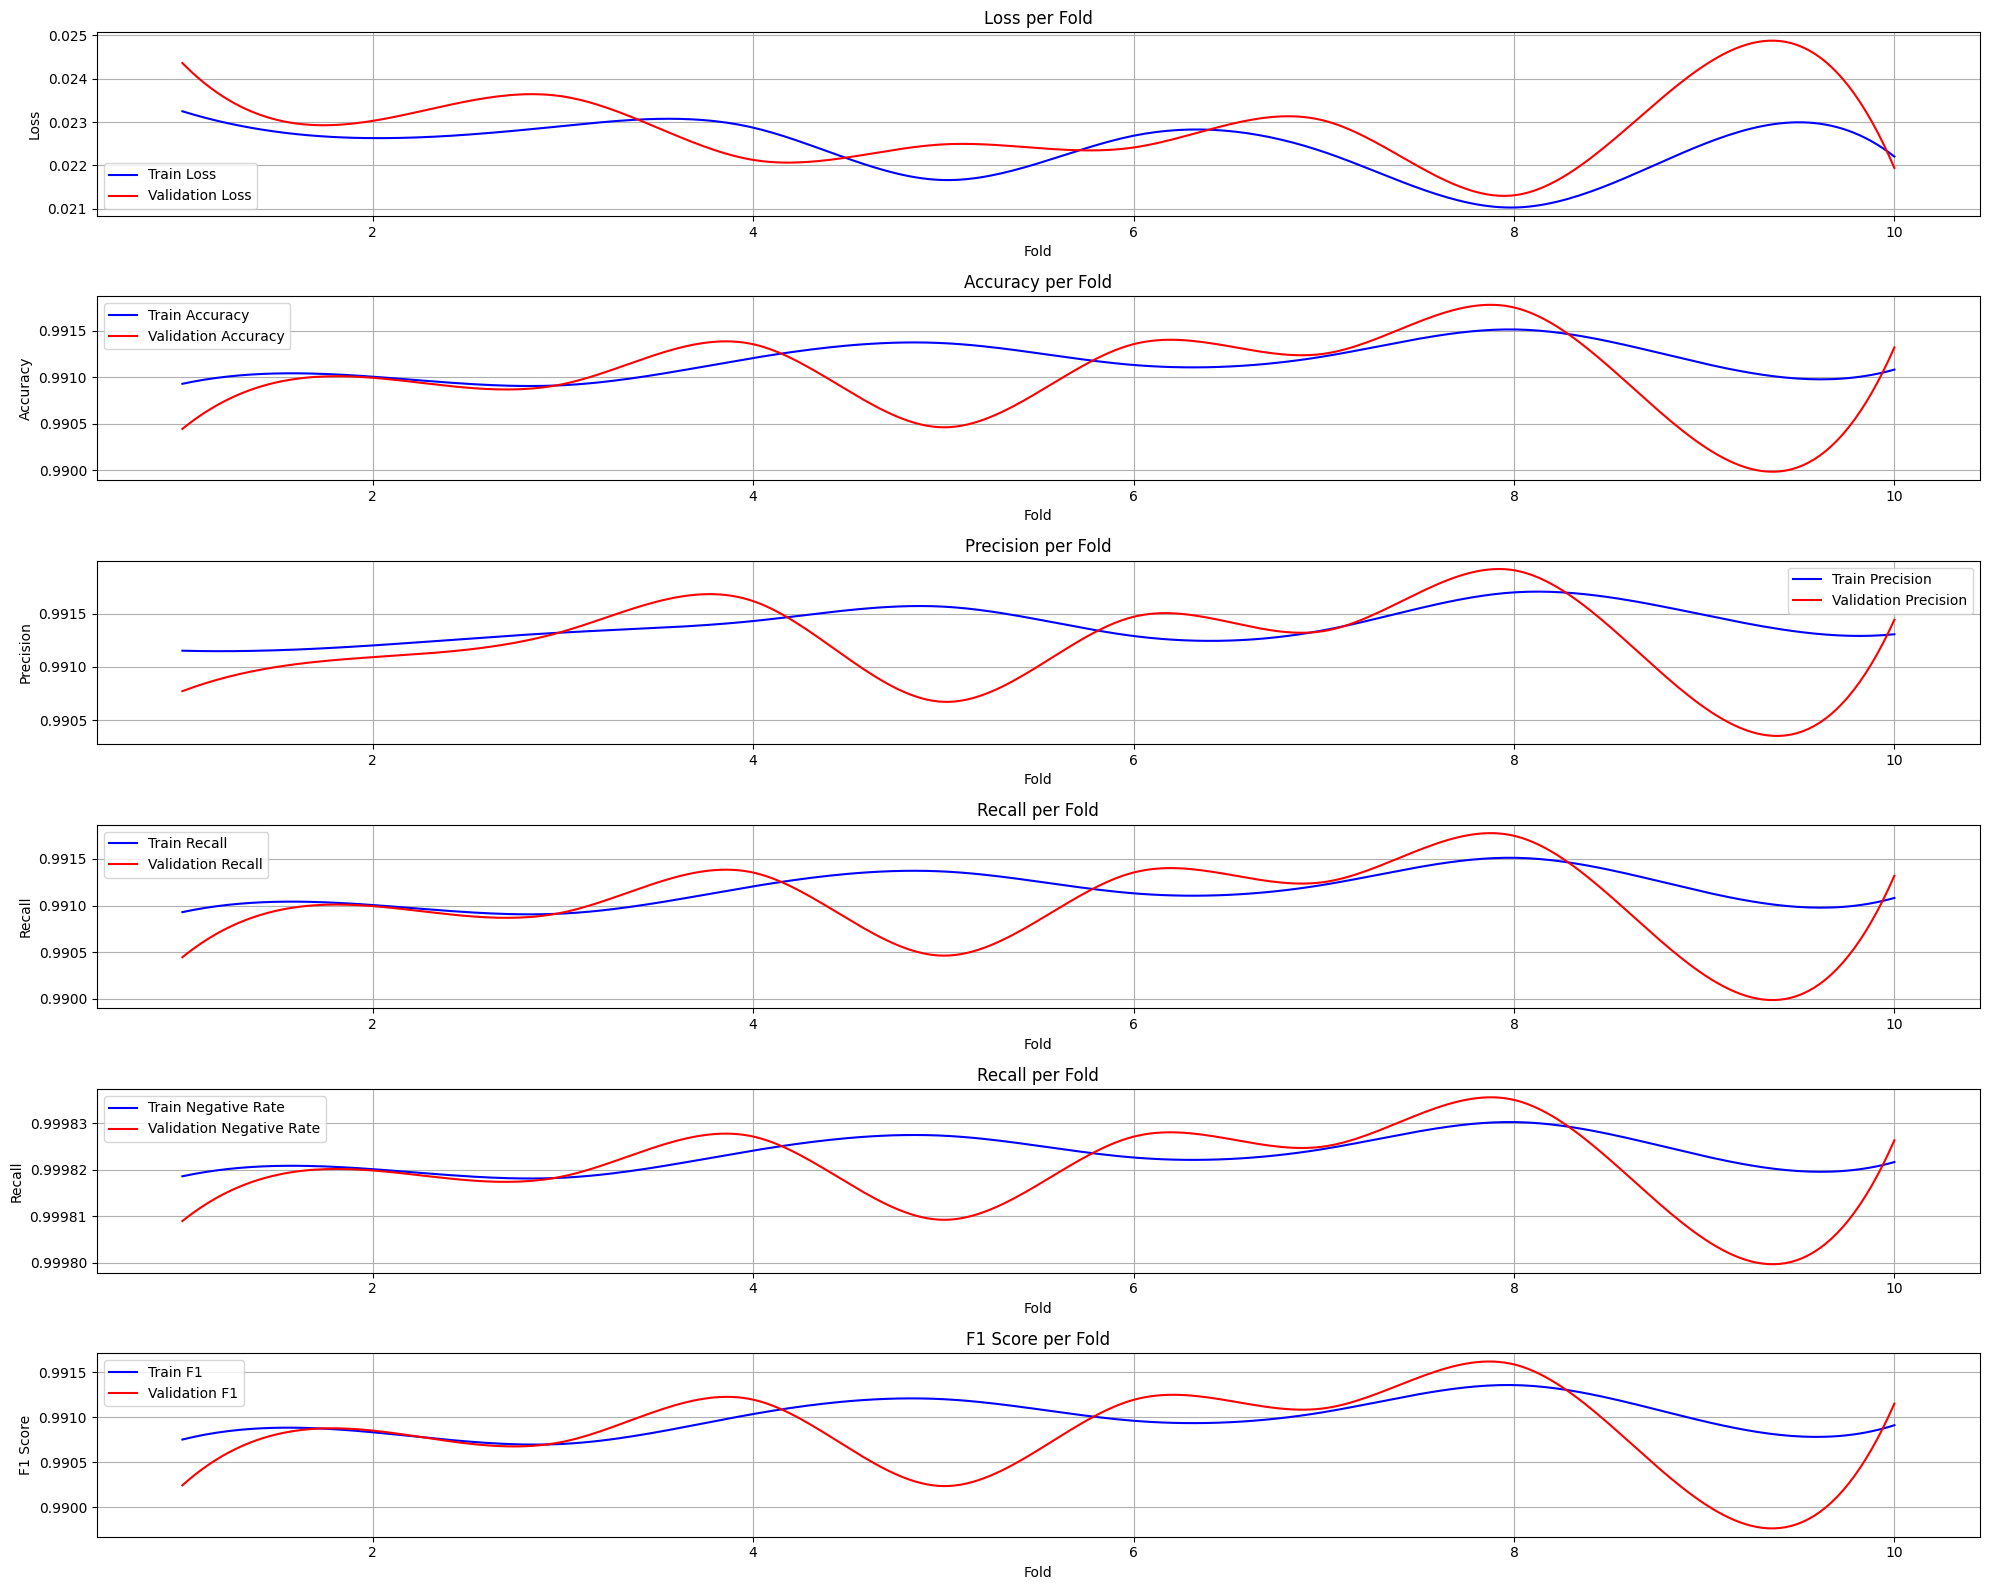

Average Train Loss: 0.0224
Average Validation Loss: 0.0229
Average Train Accuracy: 0.9912
Average Validation Accuracy: 0.9910
Average Train Precision: 0.9914
Average Validation Precision: 0.9912
Average Train Recall: 0.9912
Average Validation Recall: 0.9910
Average Train Negative Rate: 0.9998
Average Validation Negative Rate: 0.9998
Average Train F1: 0.9910
Average Validation F1: 0.9908


In [16]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values

print("Random OverSampler")
ROSample = RandomOverSampler(sampling_strategy="all")
features,target = ROSample.fit_resample(features,target)


features = torch.tensor(features, dtype=torch.float32).float().to("cuda")
target = torch.tensor(target, dtype=torch.long).long().to("cuda")
name = f"{model_name}_ROS"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model,criterion = train_validation(train_features, test_features, train_target, test_target,name)
df2 = cross_check(features,target,name)


Random UnderSampler


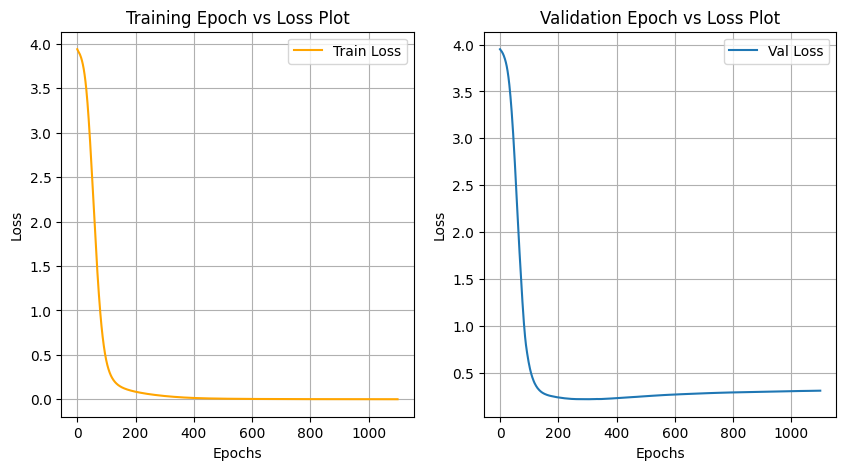

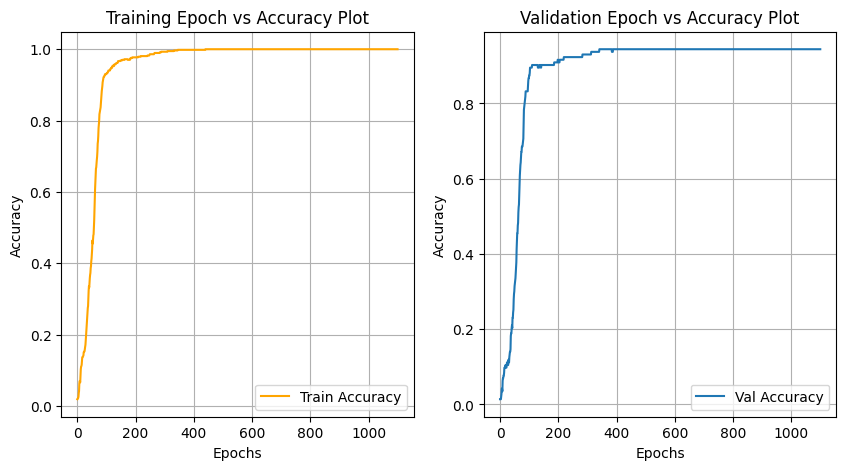

Test Accuracy: 94.41%


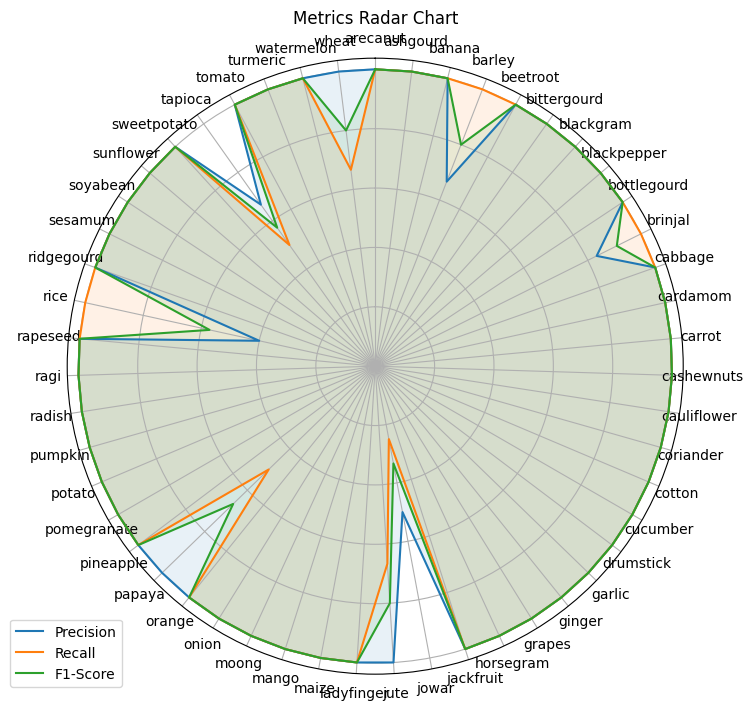

c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\shyam\OneDrive\Desktop\DL_prac\PyTorch_Tut\.myenv\lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


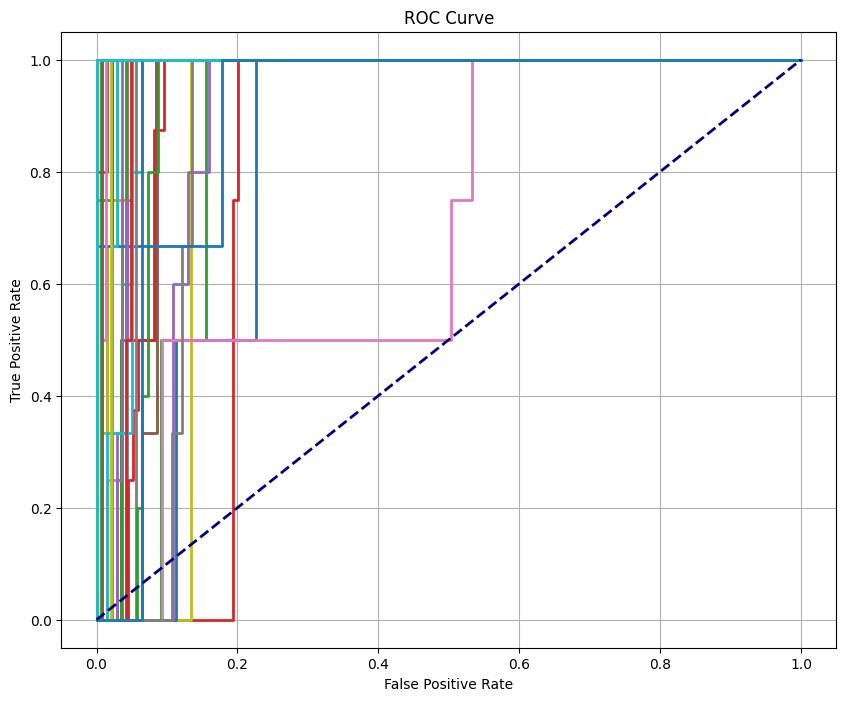

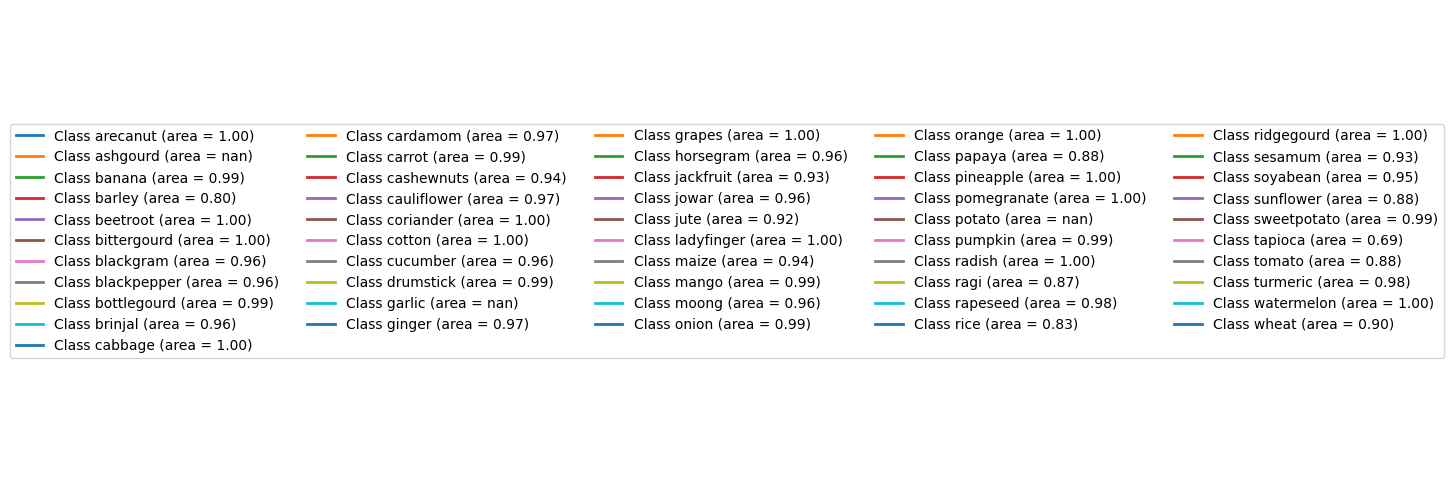

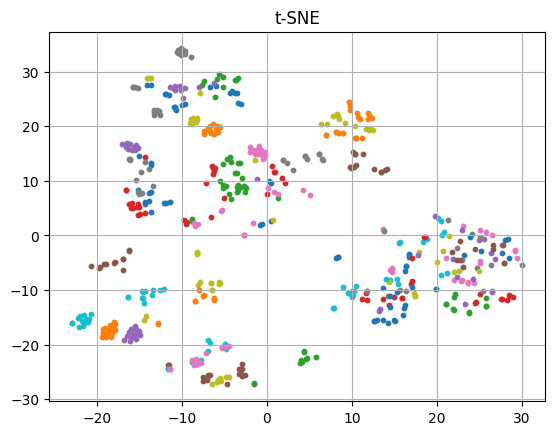

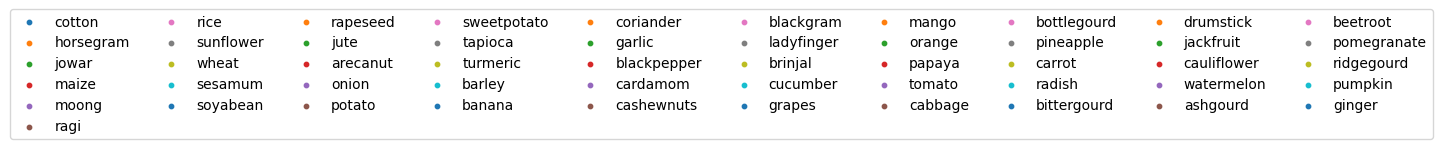

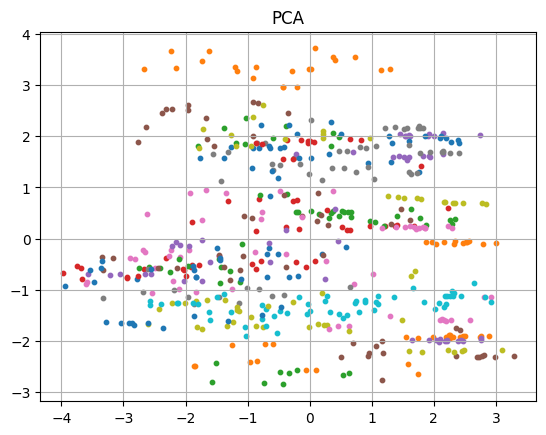

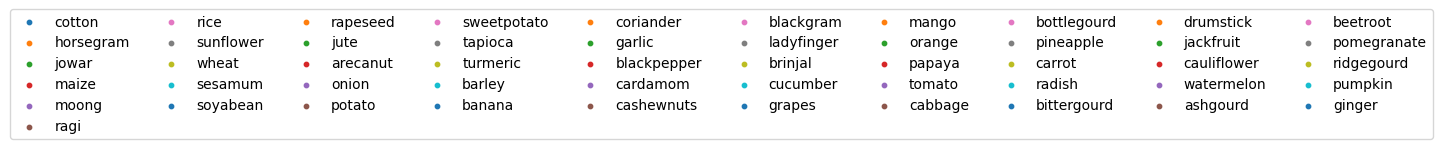

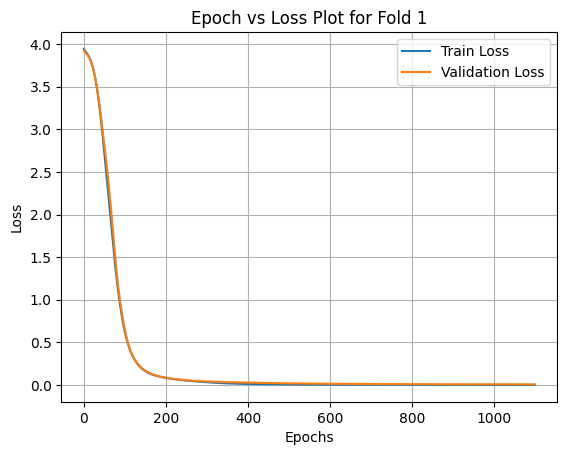

Epoch [1100/1100], Train Loss: 0.0006, Validation Loss: 0.0072
Fold 1, Train Loss: 0.0006273369072005153, Train Accuracy: 100.00%, Validation Loss: 0.007218447048217058, Validation Accuracy: 100.00%
Fold 1, Train Precision: 1.0000, Train Recall: 1.0000,Train Negative Rate: 1.0000 ,Train F1: 1.0000
Fold 1, Validation Precision: 1.0000, Validation Recall: 1.0000,Validation Negative Rate: 1.0000 ,Validation F1: 1.0000
Fold 2, Train Loss: 0.0007415367290377617, Train Accuracy: 100.00%, Validation Loss: 0.12629824876785278, Validation Accuracy: 97.22%
Fold 2, Train Precision: 1.0000, Train Recall: 1.0000,Train Negative Rate: 1.0000 ,Train F1: 1.0000
Fold 2, Validation Precision: 0.9769, Validation Recall: 0.9722,Validation Negative Rate: 0.9992 ,Validation F1: 0.9722
Fold 3, Train Loss: 0.0006855447427369654, Train Accuracy: 100.00%, Validation Loss: 0.9179739356040955, Validation Accuracy: 91.67%
Fold 3, Train Precision: 1.0000, Train Recall: 1.0000,Train Negative Rate: 1.0000 ,Train F1: 1

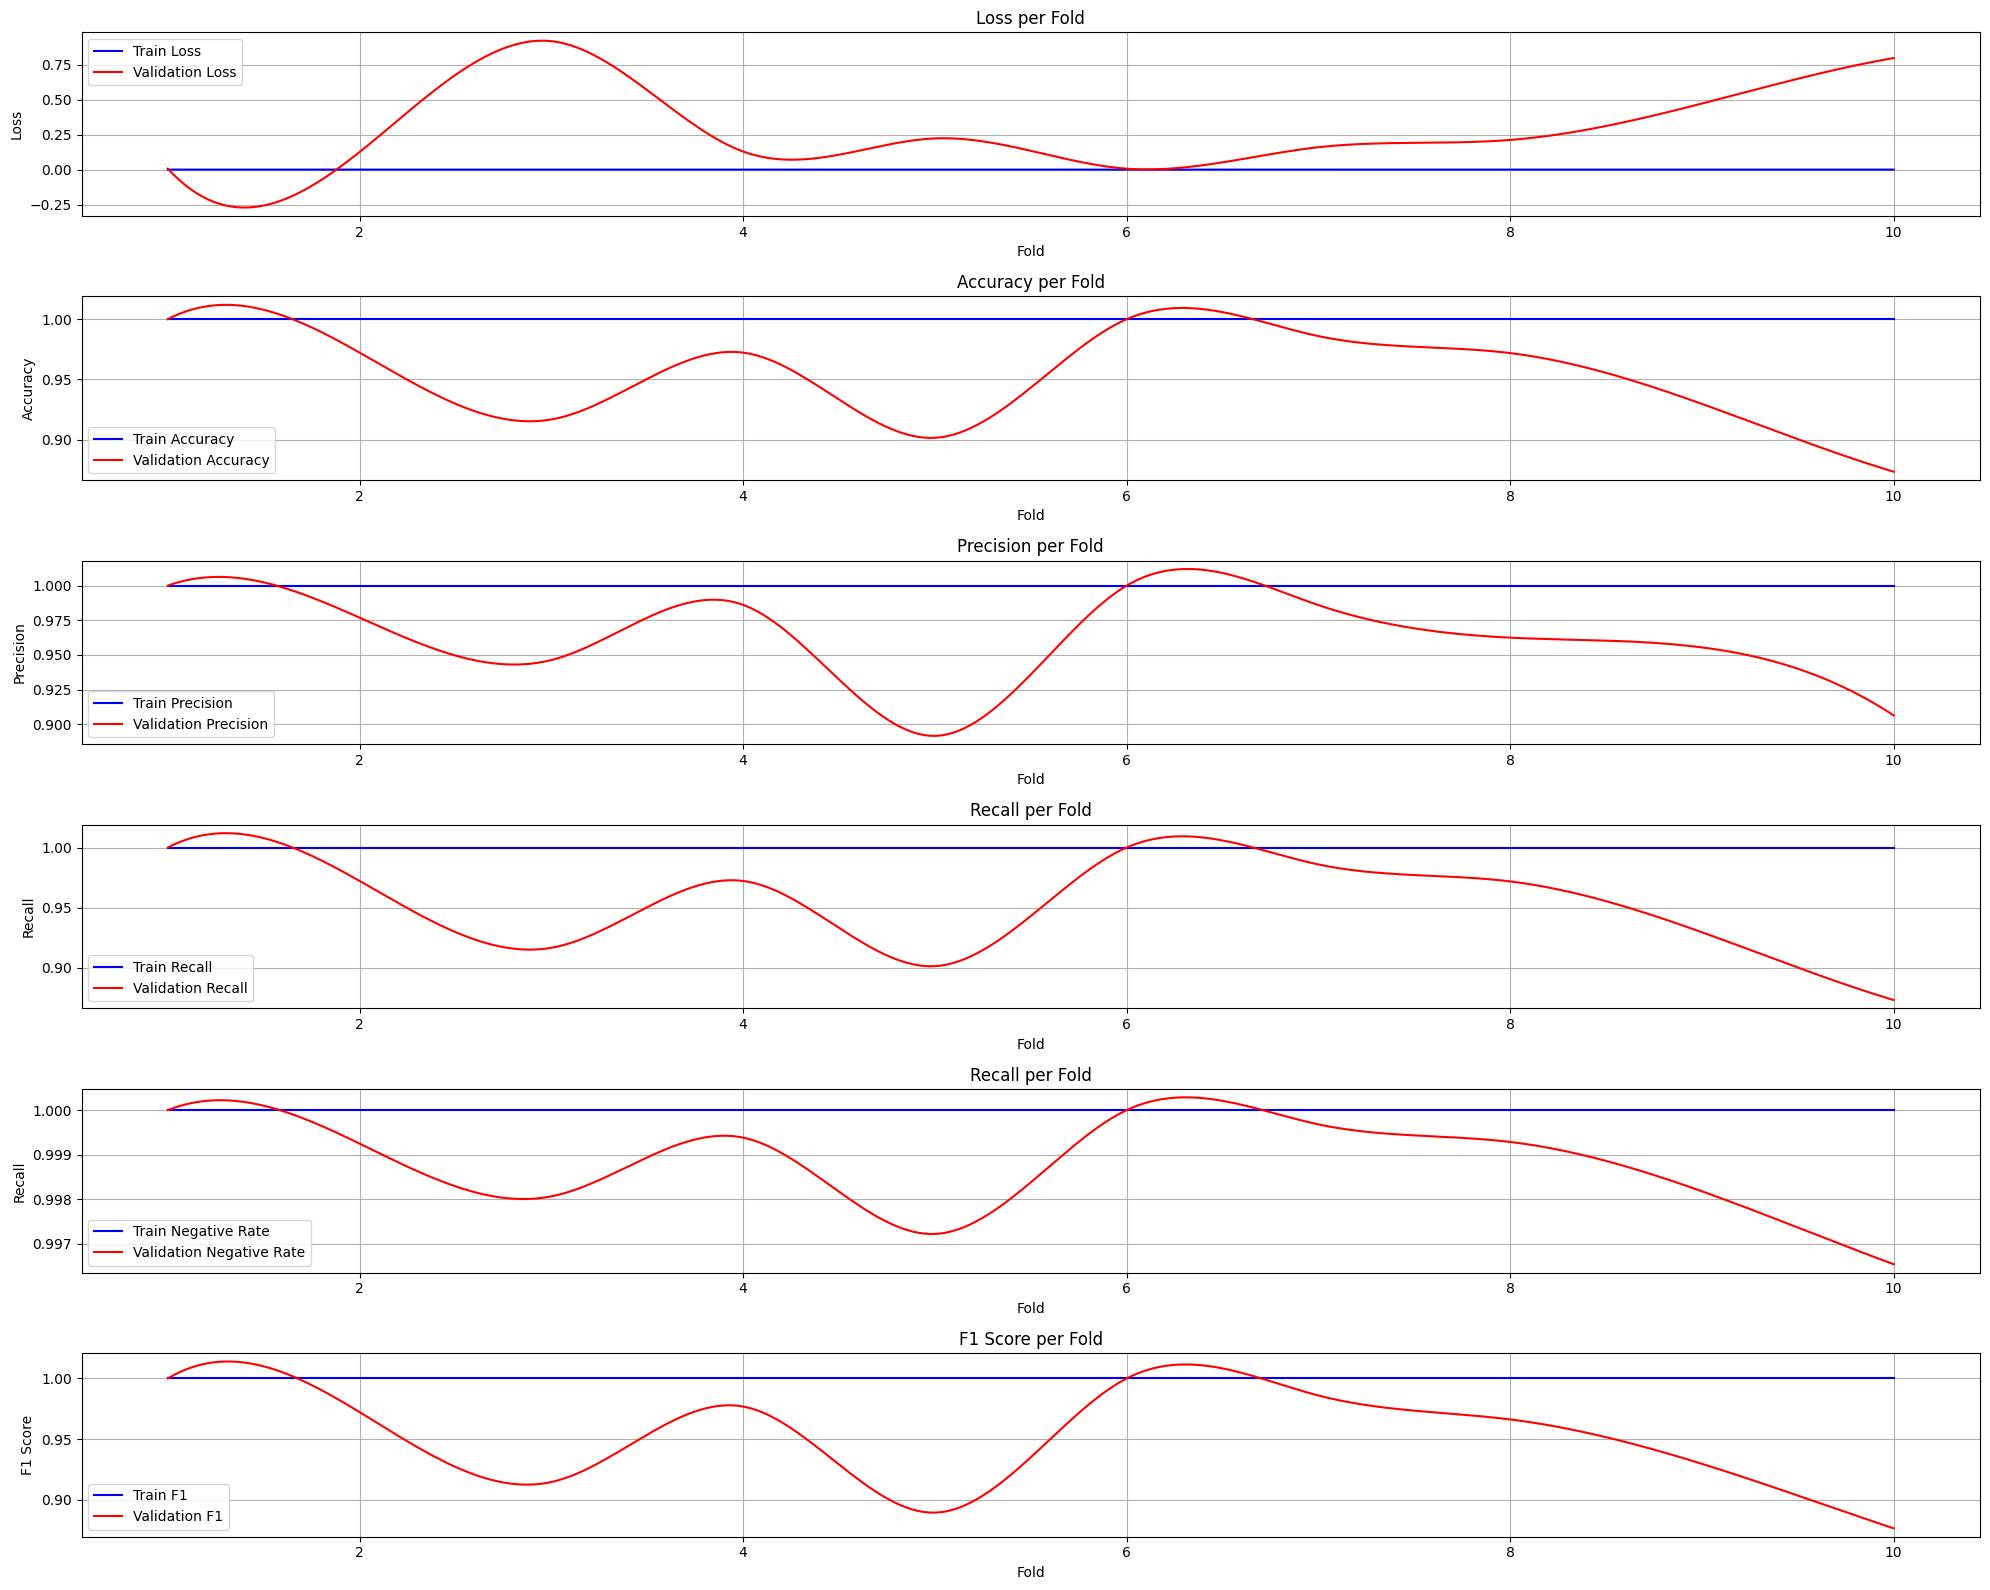

Average Train Loss: 0.0007
Average Validation Loss: 0.3055
Average Train Accuracy: 1.0000
Average Validation Accuracy: 0.9523
Average Train Precision: 1.0000
Average Validation Precision: 0.9611
Average Train Recall: 1.0000
Average Validation Recall: 0.9523
Average Train Negative Rate: 1.0000
Average Validation Negative Rate: 0.9988
Average Train F1: 1.0000
Average Validation F1: 0.9511


In [17]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values

print("Random UnderSampler")
ROSample = RandomUnderSampler(sampling_strategy="all")
features,target = ROSample.fit_resample(features,target)


features = torch.tensor(features, dtype=torch.float32).float().to("cuda")
target = torch.tensor(target, dtype=torch.long).long().to("cuda")
name = f"{model_name}_RUS"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model,criterion = train_validation(train_features, test_features, train_target, test_target,name)
df3 = cross_check(features,target,name)

SMOTE


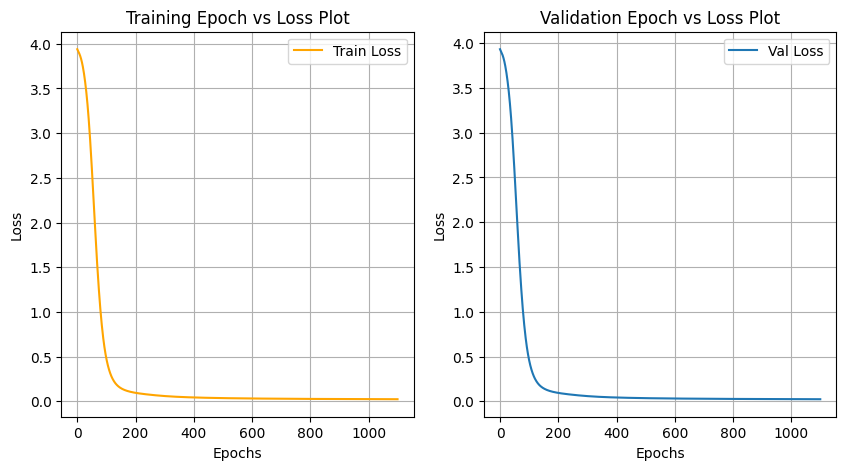

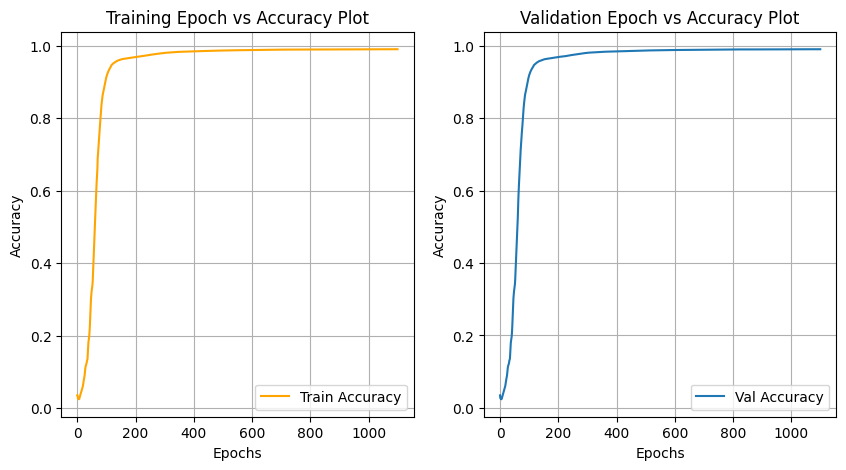

Test Accuracy: 99.07%


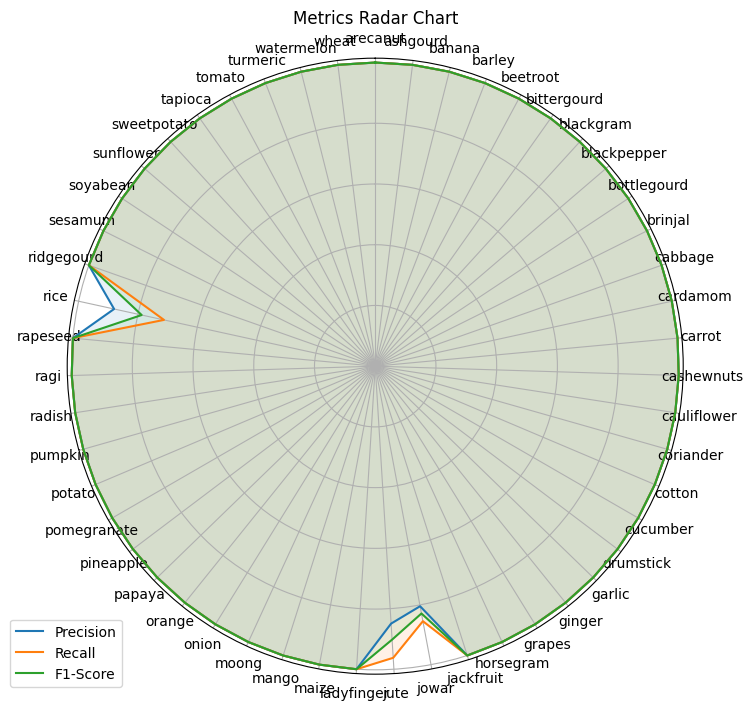

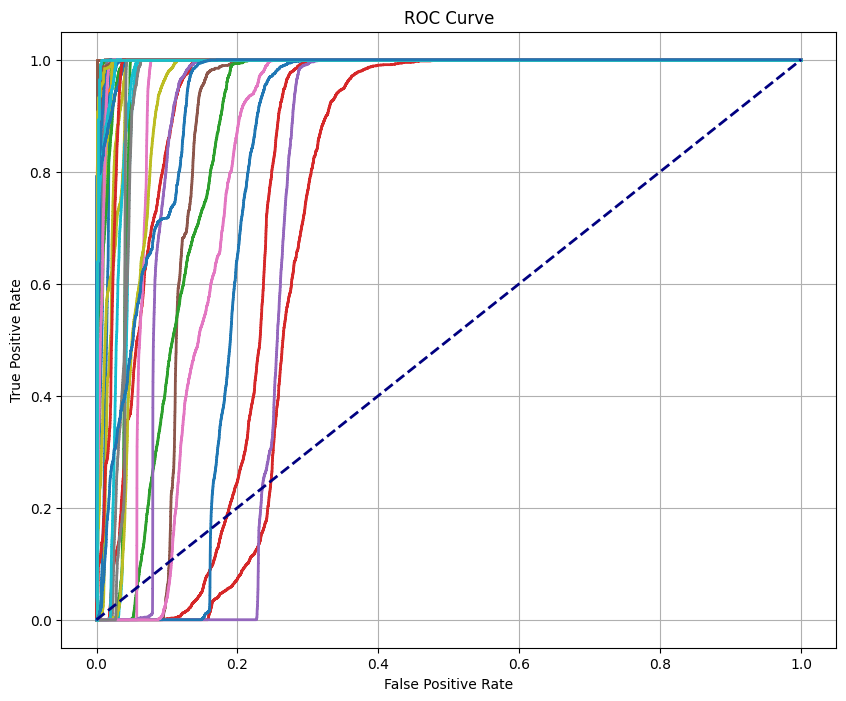

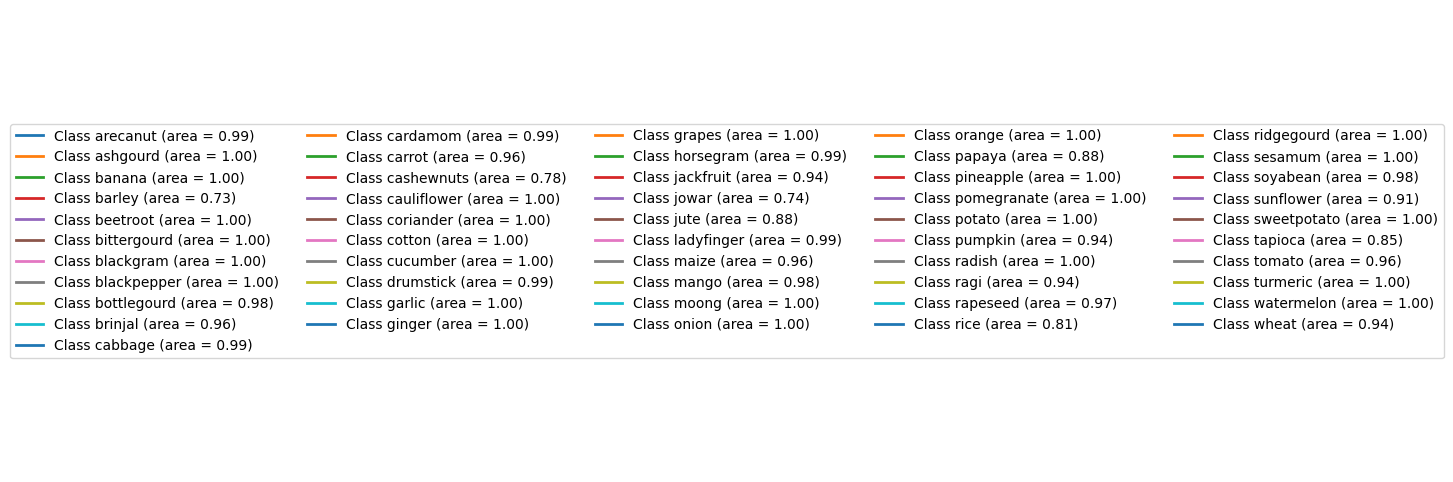

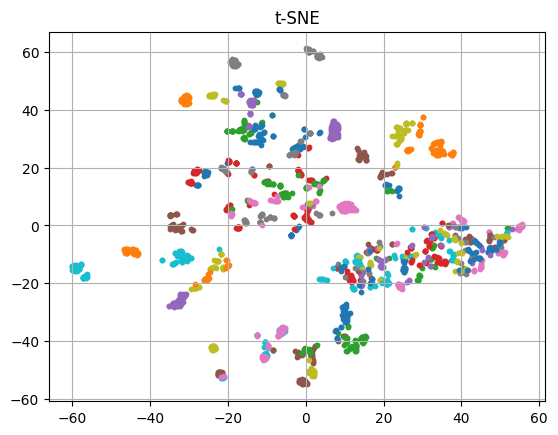

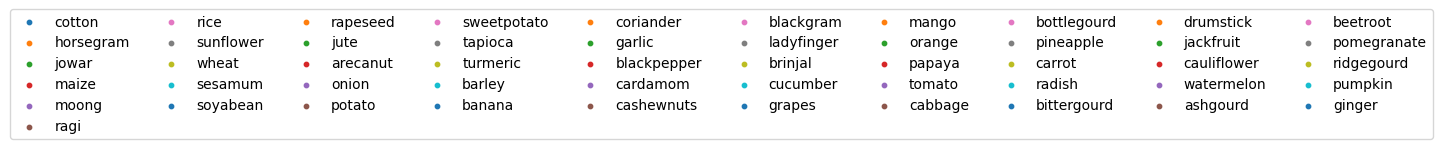

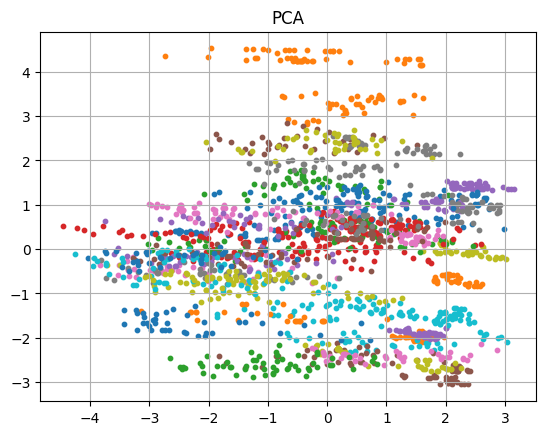

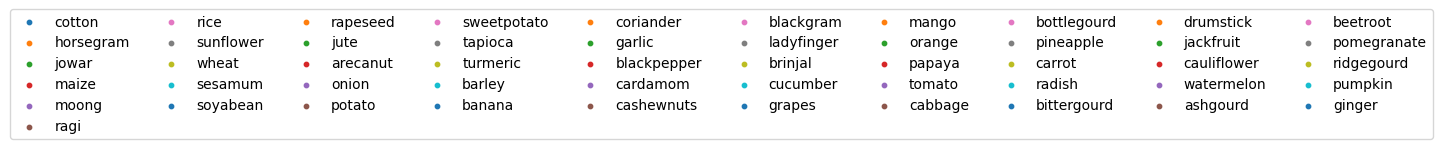

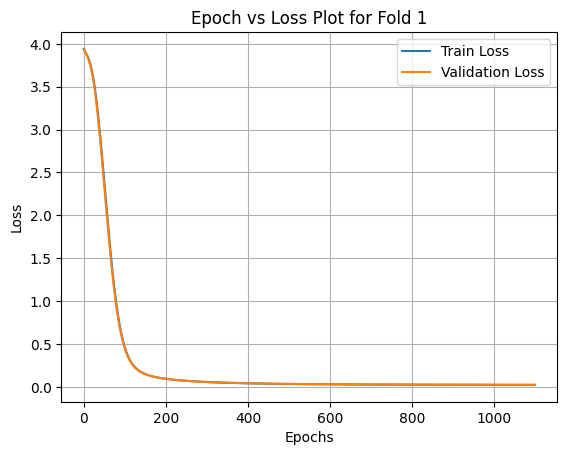

Epoch [1100/1100], Train Loss: 0.0218, Validation Loss: 0.0236
Fold 1, Train Loss: 0.02180522121489048, Train Accuracy: 99.15%, Validation Loss: 0.023567717522382736, Validation Accuracy: 99.02%
Fold 1, Train Precision: 0.9917, Train Recall: 0.9915,Train Negative Rate: 0.9998 ,Train F1: 0.9913
Fold 1, Validation Precision: 0.9904, Validation Recall: 0.9902,Validation Negative Rate: 0.9998 ,Validation F1: 0.9900
Fold 2, Train Loss: 0.02234896458685398, Train Accuracy: 99.11%, Validation Loss: 0.022782860323786736, Validation Accuracy: 99.14%
Fold 2, Train Precision: 0.9914, Train Recall: 0.9911,Train Negative Rate: 0.9998 ,Train F1: 0.9909
Fold 2, Validation Precision: 0.9916, Validation Recall: 0.9914,Validation Negative Rate: 0.9998 ,Validation F1: 0.9912
Fold 3, Train Loss: 0.02245398610830307, Train Accuracy: 99.09%, Validation Loss: 0.02259262464940548, Validation Accuracy: 99.05%
Fold 3, Train Precision: 0.9911, Train Recall: 0.9909,Train Negative Rate: 0.9998 ,Train F1: 0.9907
Fo

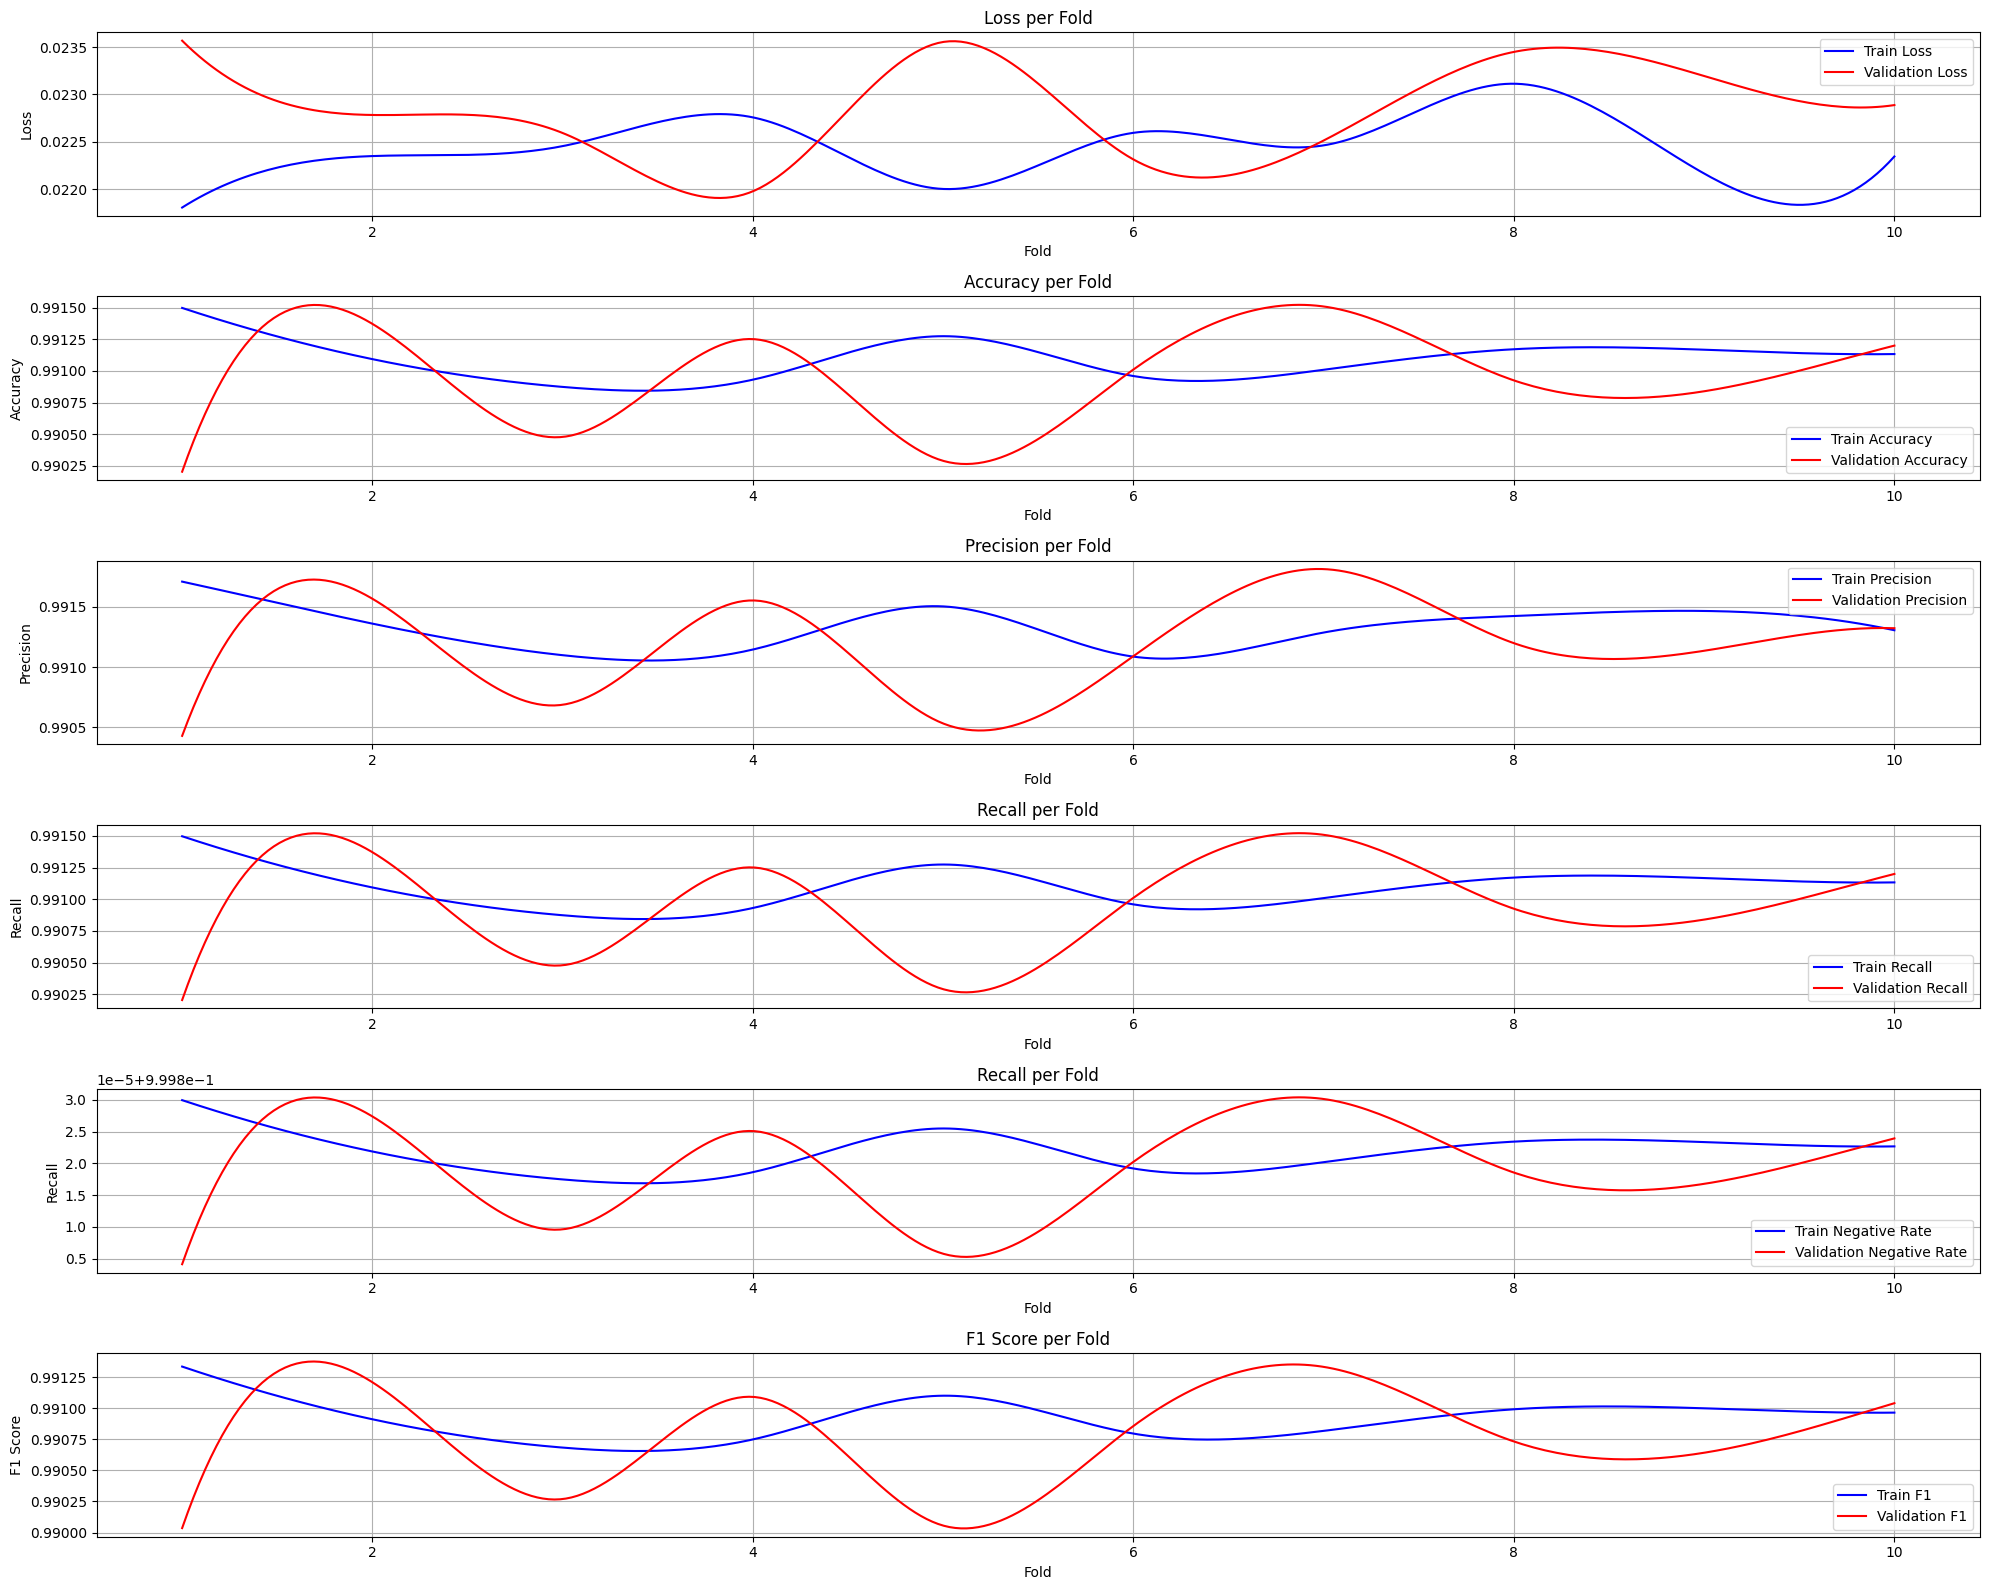

Average Train Loss: 0.0224
Average Validation Loss: 0.0229
Average Train Accuracy: 0.9911
Average Validation Accuracy: 0.9909
Average Train Precision: 0.9913
Average Validation Precision: 0.9911
Average Train Recall: 0.9911
Average Validation Recall: 0.9909
Average Train Negative Rate: 0.9998
Average Validation Negative Rate: 0.9998
Average Train F1: 0.9909
Average Validation F1: 0.9907


In [18]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values

print("SMOTE")

ROSample = SMOTE()
features,target = ROSample.fit_resample(features,target)


features = torch.tensor(features, dtype=torch.float32).float().to("cuda")
target = torch.tensor(target, dtype=torch.long).long().to("cuda")
name = f"{model_name}_SMOTE"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model,criterion = train_validation(train_features, test_features, train_target, test_target,name)
df4 = cross_check(features,target,name)

SMOTE + Tomek


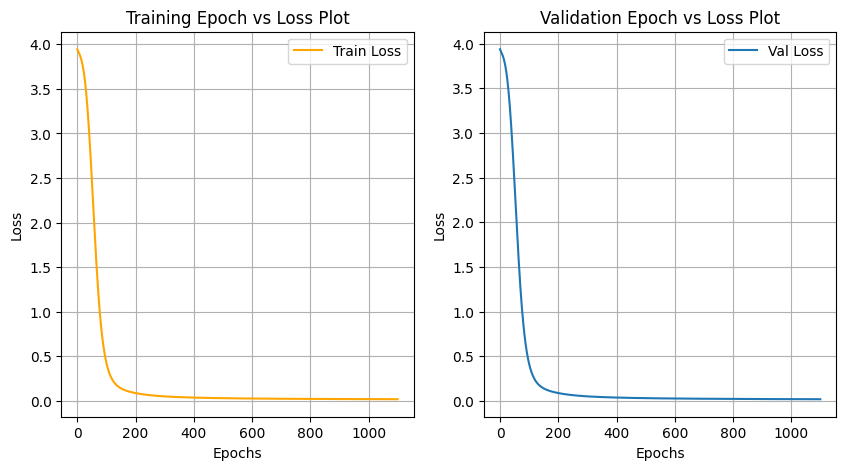

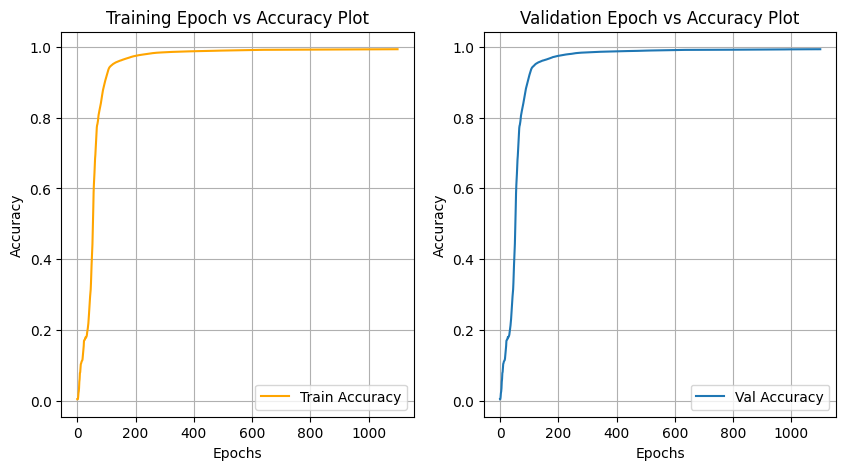

Test Accuracy: 99.28%


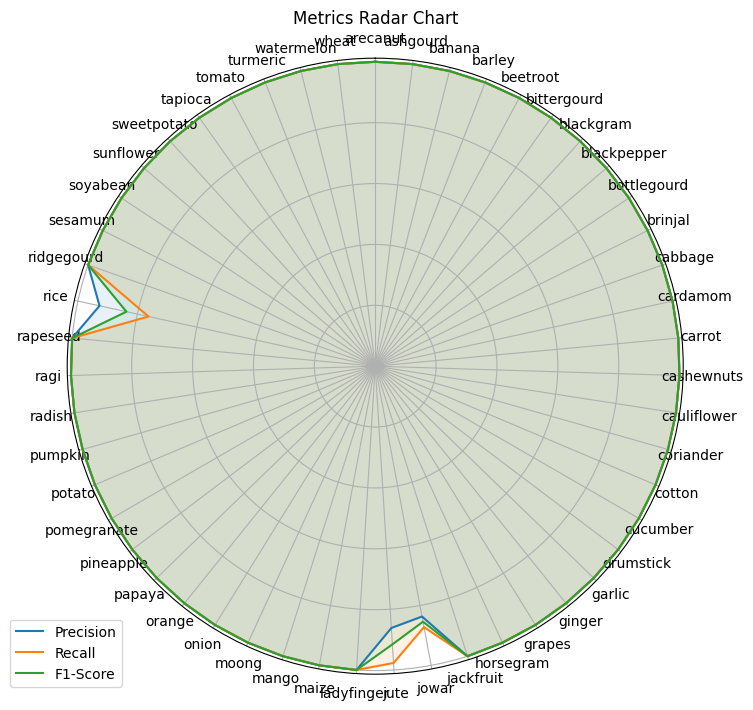

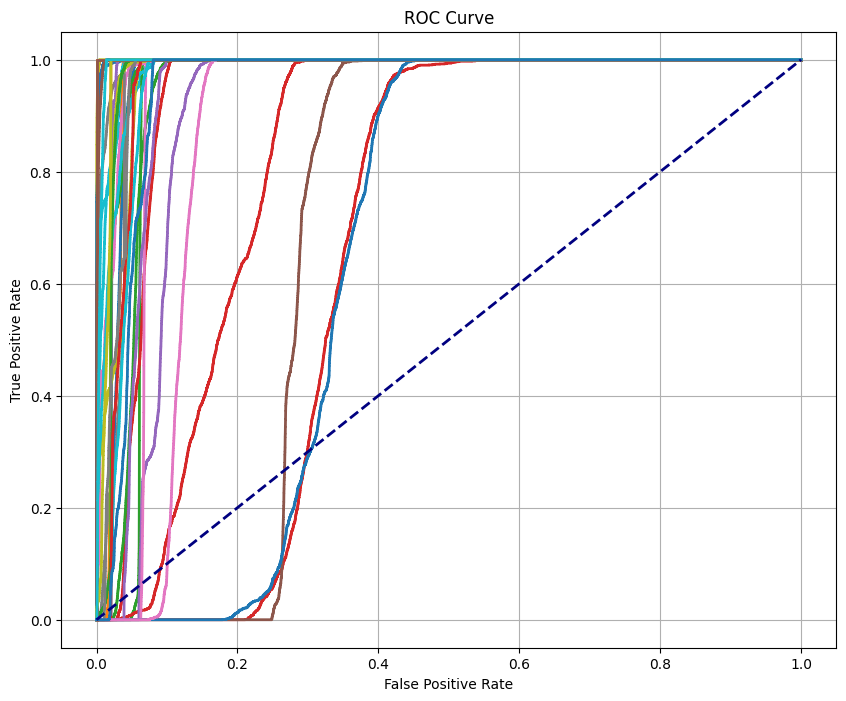

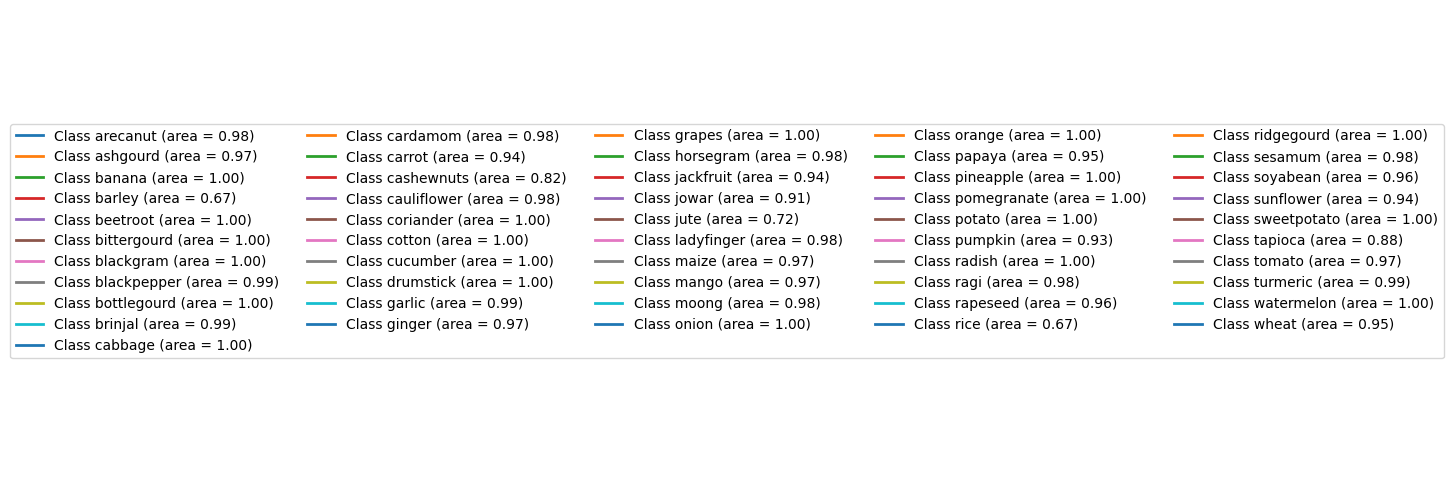

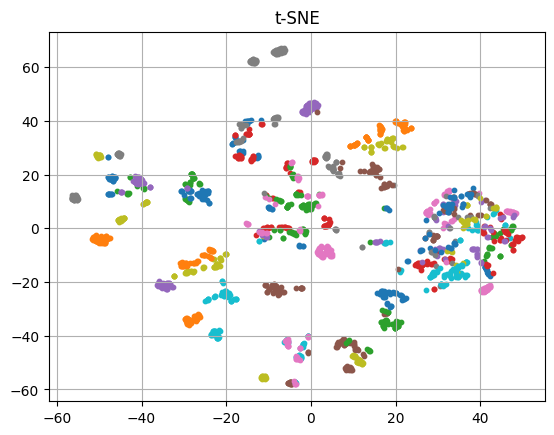

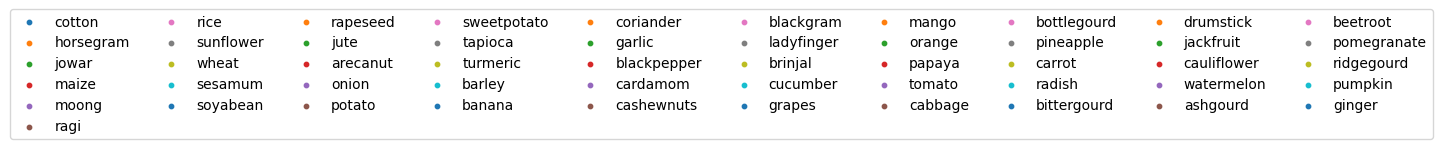

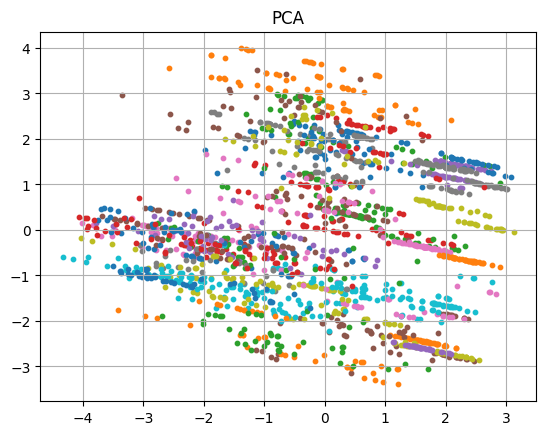

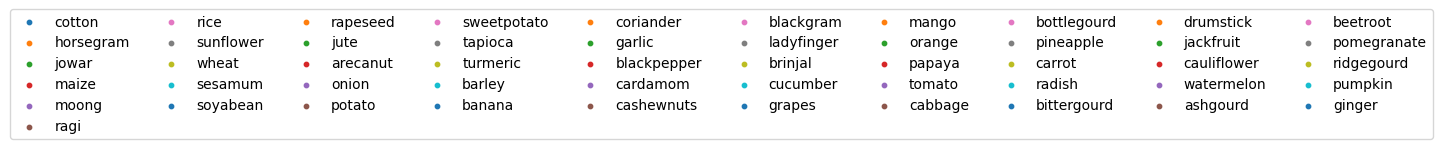

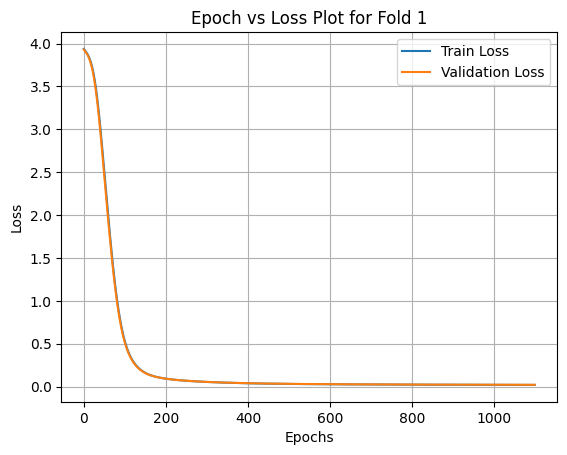

Epoch [1100/1100], Train Loss: 0.0193, Validation Loss: 0.0206
Fold 1, Train Loss: 0.019284483045339584, Train Accuracy: 99.28%, Validation Loss: 0.02060024067759514, Validation Accuracy: 99.21%
Fold 1, Train Precision: 0.9930, Train Recall: 0.9928,Train Negative Rate: 0.9999 ,Train F1: 0.9927
Fold 1, Validation Precision: 0.9923, Validation Recall: 0.9921,Validation Negative Rate: 0.9998 ,Validation F1: 0.9920
Fold 2, Train Loss: 0.019370337948203087, Train Accuracy: 99.27%, Validation Loss: 0.01900714822113514, Validation Accuracy: 99.31%
Fold 2, Train Precision: 0.9929, Train Recall: 0.9927,Train Negative Rate: 0.9999 ,Train F1: 0.9926
Fold 2, Validation Precision: 0.9933, Validation Recall: 0.9931,Validation Negative Rate: 0.9999 ,Validation F1: 0.9930
Fold 3, Train Loss: 0.019807422533631325, Train Accuracy: 99.25%, Validation Loss: 0.019876550883054733, Validation Accuracy: 99.23%
Fold 3, Train Precision: 0.9927, Train Recall: 0.9925,Train Negative Rate: 0.9999 ,Train F1: 0.9924


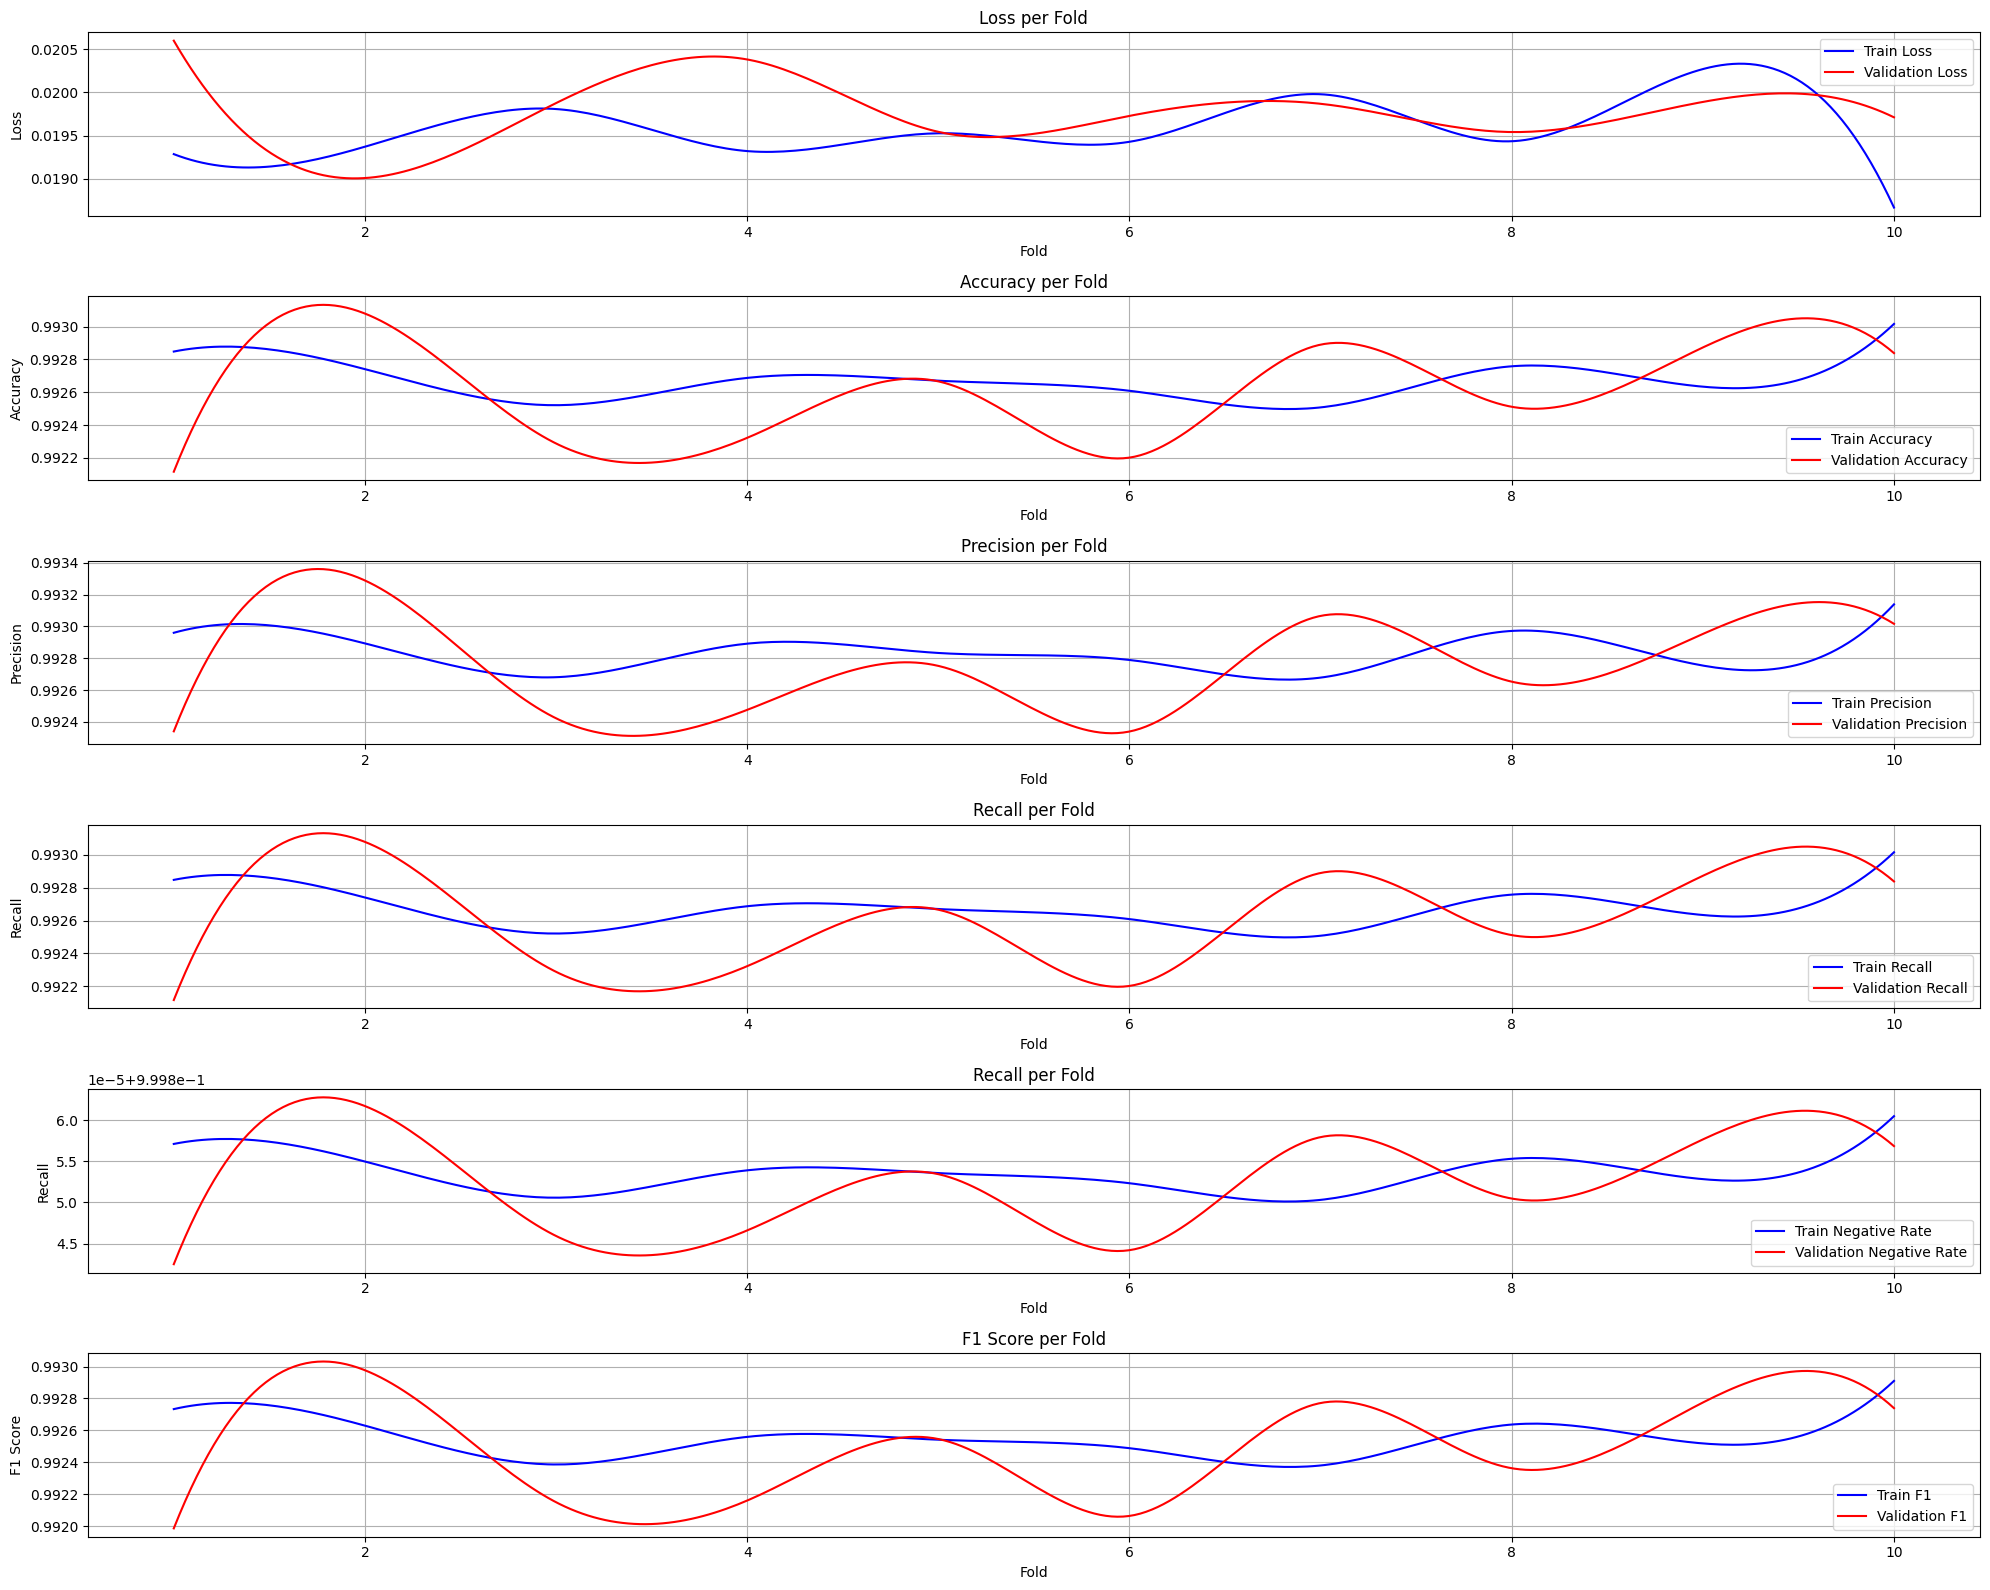

Average Train Loss: 0.0195
Average Validation Loss: 0.0198
Average Train Accuracy: 0.9927
Average Validation Accuracy: 0.9926
Average Train Precision: 0.9929
Average Validation Precision: 0.9927
Average Train Recall: 0.9927
Average Validation Recall: 0.9926
Average Train Negative Rate: 0.9999
Average Validation Negative Rate: 0.9999
Average Train F1: 0.9926
Average Validation F1: 0.9925


In [19]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values

print("SMOTE + Tomek")

ROSample = SMOTETomek()
features,target = ROSample.fit_resample(features,target)



features = torch.tensor(features, dtype=torch.float32).float().to("cuda")
target = torch.tensor(target, dtype=torch.long).long().to("cuda")
name = f"{model_name}_SMOTETOMEK"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model,criterion = train_validation(train_features, test_features, train_target, test_target,name)
df5 = cross_check(features,target,name)

SMOTEENN


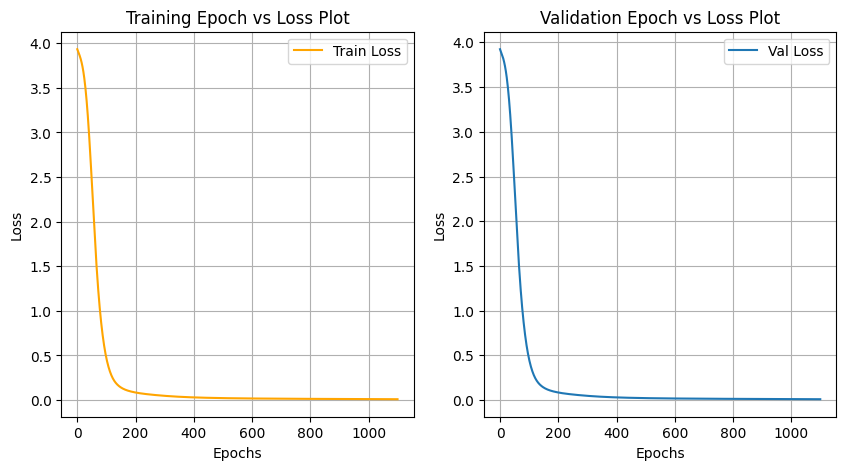

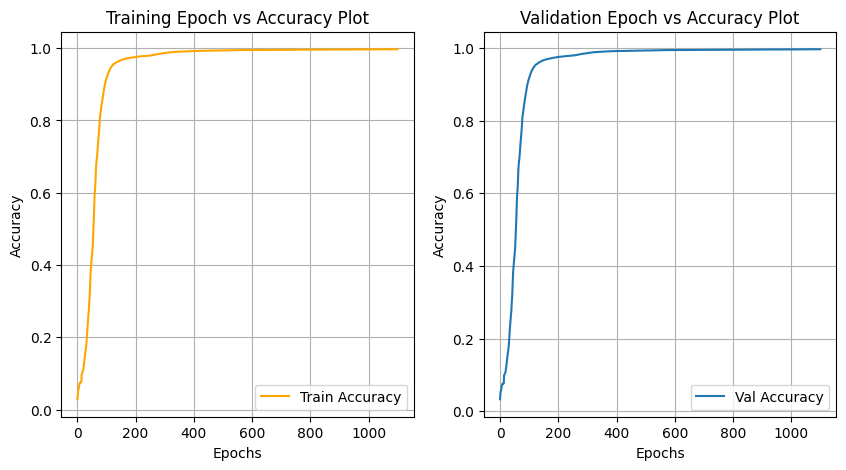

Test Accuracy: 99.71%


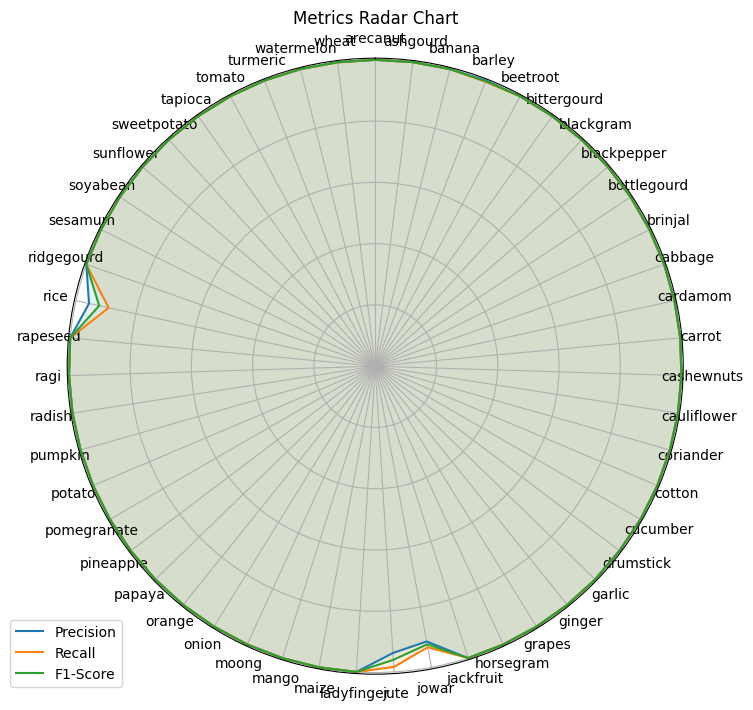

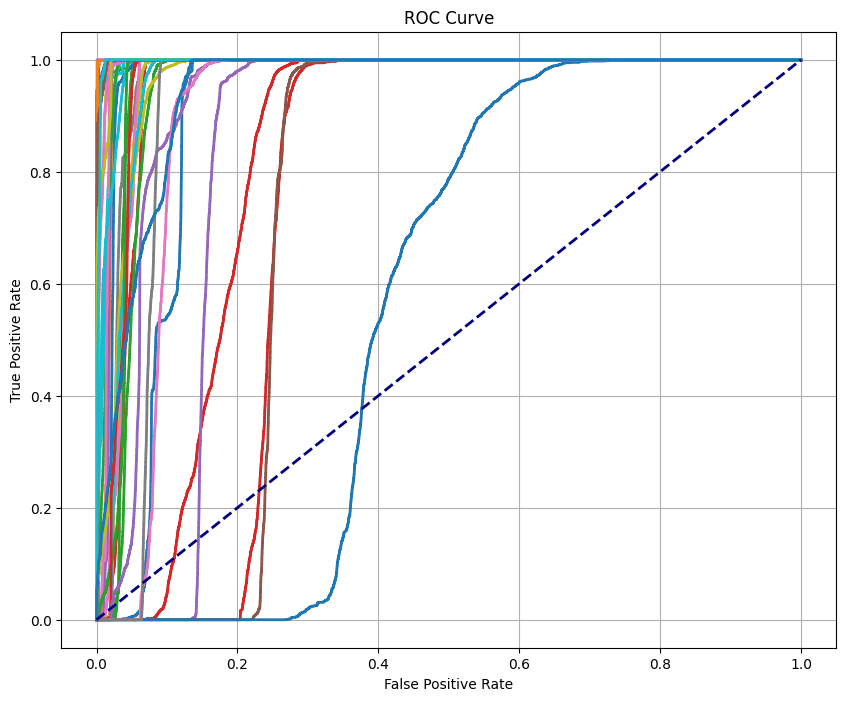

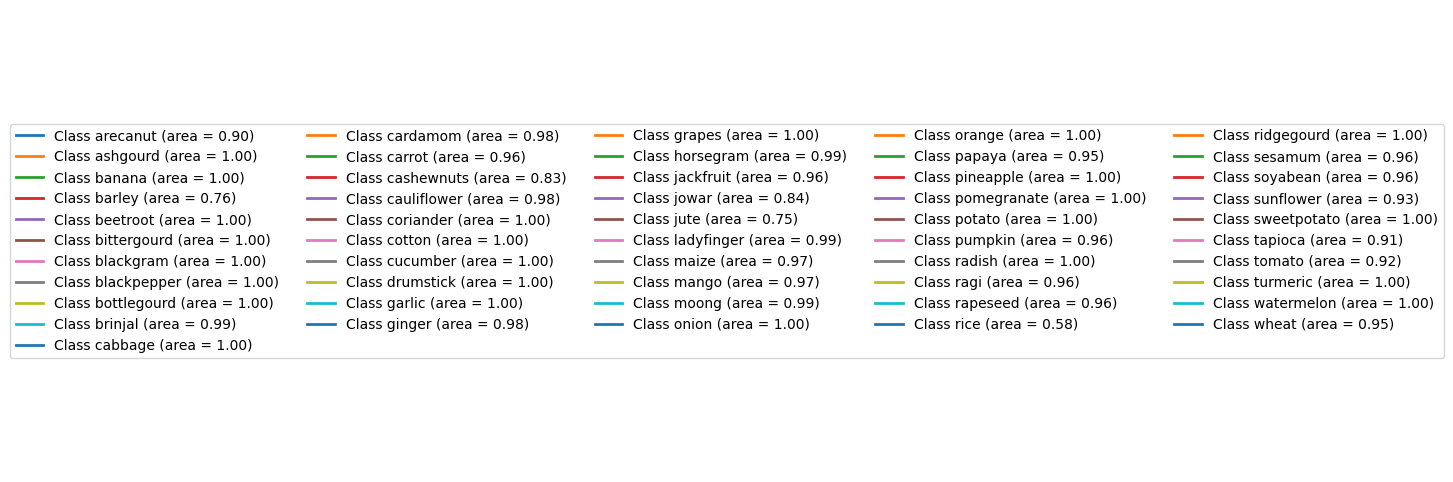

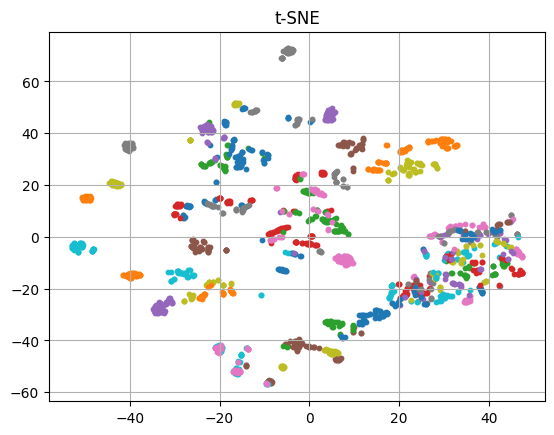

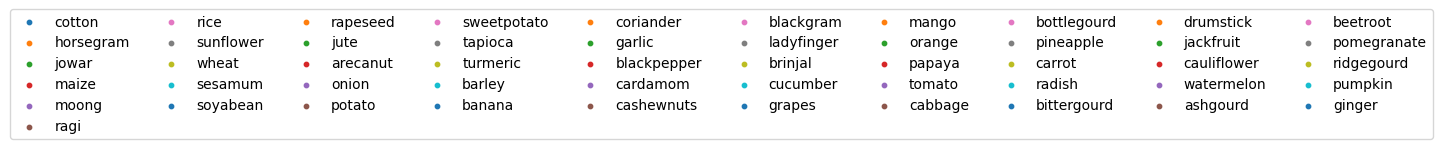

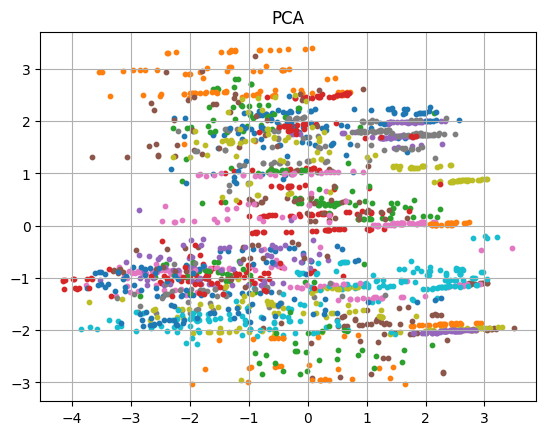

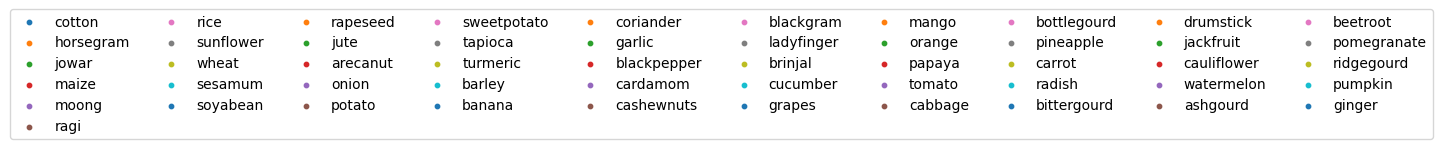

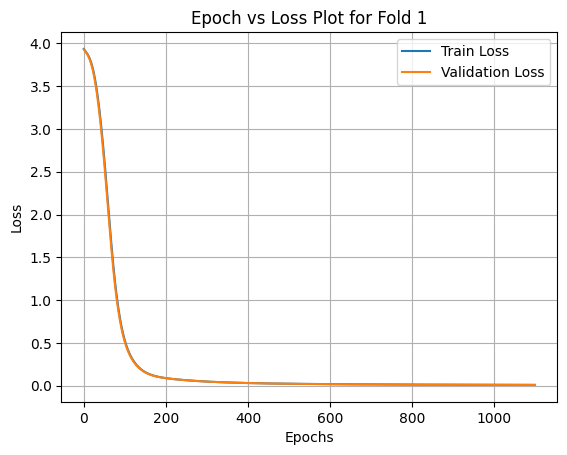

Epoch [1100/1100], Train Loss: 0.0085, Validation Loss: 0.0082
Fold 1, Train Loss: 0.008535689674317837, Train Accuracy: 99.74%, Validation Loss: 0.008165564388036728, Validation Accuracy: 99.77%
Fold 1, Train Precision: 0.9974, Train Recall: 0.9974,Train Negative Rate: 0.9999 ,Train F1: 0.9974
Fold 1, Validation Precision: 0.9977, Validation Recall: 0.9977,Validation Negative Rate: 1.0000 ,Validation F1: 0.9977
Fold 2, Train Loss: 0.00828150101006031, Train Accuracy: 99.77%, Validation Loss: 0.008412159979343414, Validation Accuracy: 99.77%
Fold 2, Train Precision: 0.9977, Train Recall: 0.9977,Train Negative Rate: 1.0000 ,Train F1: 0.9977
Fold 2, Validation Precision: 0.9977, Validation Recall: 0.9977,Validation Negative Rate: 1.0000 ,Validation F1: 0.9977
Fold 3, Train Loss: 0.008951185271143913, Train Accuracy: 99.73%, Validation Loss: 0.009804178029298782, Validation Accuracy: 99.72%
Fold 3, Train Precision: 0.9973, Train Recall: 0.9973,Train Negative Rate: 0.9999 ,Train F1: 0.9972

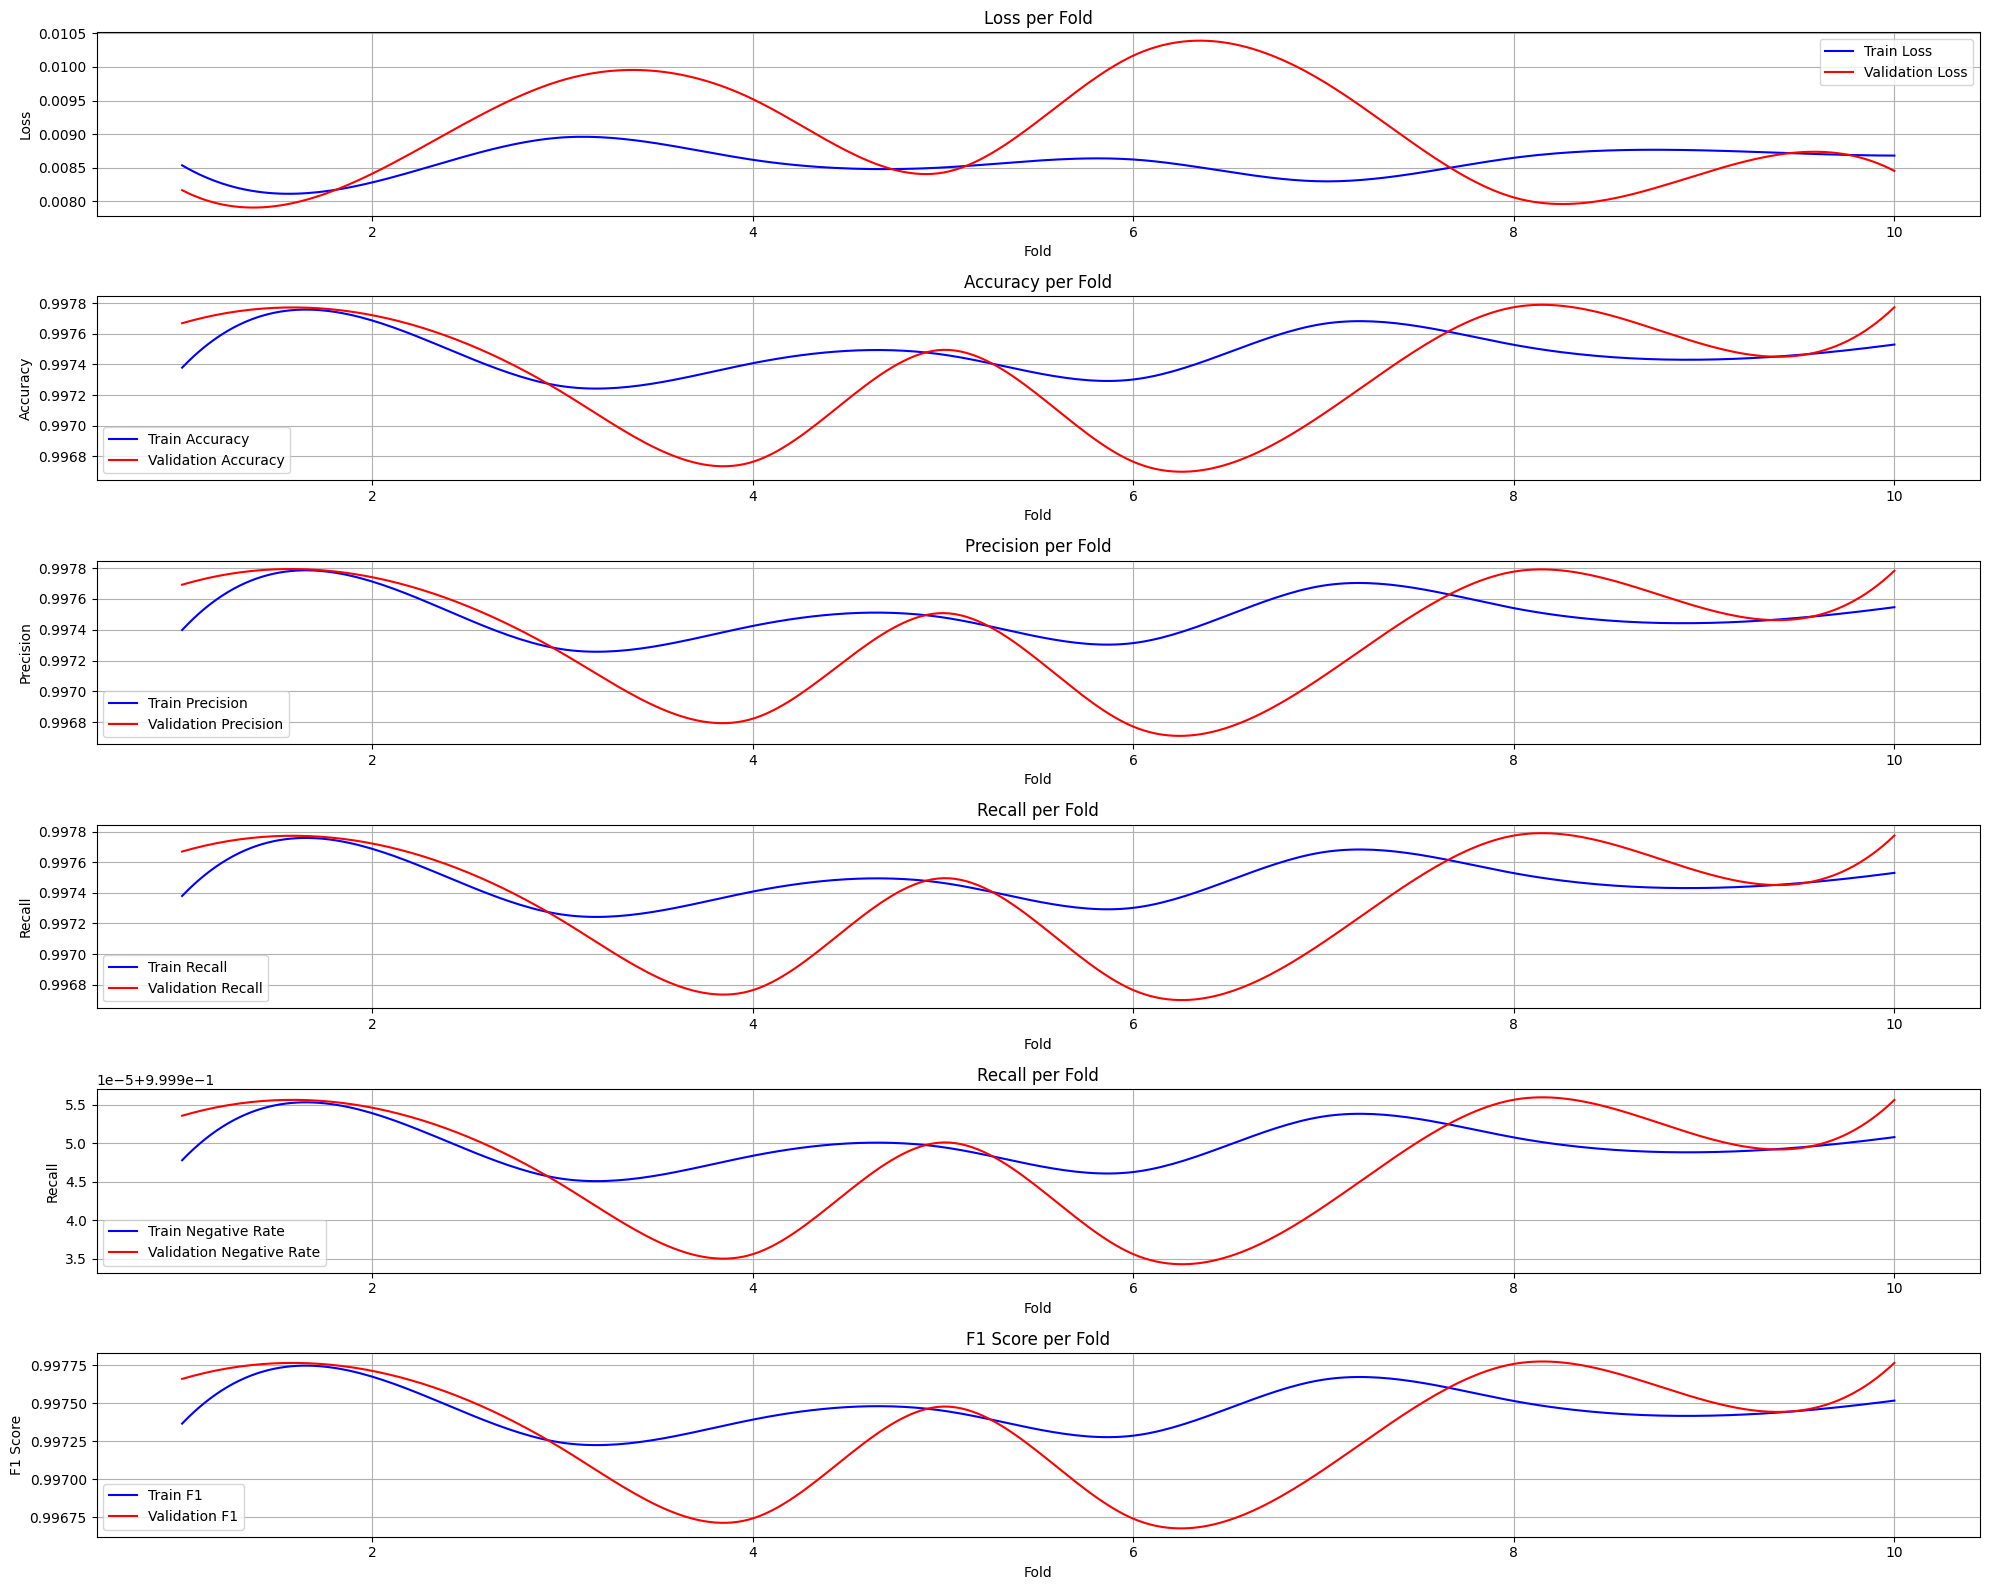

Average Train Loss: 0.0086
Average Validation Loss: 0.0089
Average Train Accuracy: 0.9975
Average Validation Accuracy: 0.9974
Average Train Precision: 0.9975
Average Validation Precision: 0.9974
Average Train Recall: 0.9975
Average Validation Recall: 0.9974
Average Train Negative Rate: 0.9999
Average Validation Negative Rate: 0.9999
Average Train F1: 0.9975
Average Validation F1: 0.9974


In [20]:
features = data.drop(columns=['Crop']).values
target = data['Crop'].values

print("SMOTEENN")

ROSample = SMOTEENN()
features,target = ROSample.fit_resample(features,target)



features = torch.tensor(features, dtype=torch.float32).float().to("cuda")
target = torch.tensor(target, dtype=torch.long).long().to("cuda")
name = f"{model_name}_SMOTEENN"
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)
model,criterion = train_validation(train_features, test_features, train_target, test_target,name)
df6 = cross_check(features,target,name)

In [21]:
df1.to_csv(f"../Results/{model_name}_Initial.csv",index=False)
df2.to_csv(f"../Results/{model_name}_ROS.csv",index=False)
df3.to_csv(f"../Results/{model_name}_RUS.csv",index=False)
df4.to_csv(f"../Results/{model_name}_SMOTE.csv",index=False)
df5.to_csv(f"../Results/{model_name}_SMOTE+TOMEK.csv",index=False)
df6.to_csv(f"../Results/{model_name}_SMOTEENN.csv",index=False)